##  Final Project - <span style="color:Navy"> __Is The Ocean Running Out of Oxygen?__ 
### This notebook analyzes the oxygen content of the world's oceans in the past, present, and projected into the future.
### We will conduct calculations to investigate if the ocean is losing oxygen by utilizing each ocean basin's recorded dissolved oxygen, oxygen saturation percentage, and apparent oxygen utilization.
#### __Authors__: Nadia Chichester, Beth Cosminski, Megan Siwak For any questions regarding the contents of this notebook, please contact us at nadia.chichester@temple.edu, mary.elizabeth.cosminski@temple.edu, megan.siwak@temple.edu

___

## <span style="color:darkgray"><u> __Lesson objective__

### You should be __entering__ this lesson with ...
1. Knowledge of basic plots
2.  Understanding of basic math concepts

### You should be __leaving__ this lesson with ...
1. An understanding of why oxygen is essential in the ocean.
2. Learn about each ocean basin and how they are different.
3. Explore how ocean oxygen relates to the atmosphere and land.
4. Study how oxygen is used, its saturation levels, and changes over time.
5. Use essential math tools (like averages and percentages) to find patterns in space and time.

___

# <span style="color:Navy"> __Oxygen__

<img src="https://marine.copernicus.eu/sites/default/files/styles/1370px_width/public/media/image/2023-10/O2_Reservoir.png" alt="drawing" width="1500"/>

##### __Img 1.__

#### <span style="color:Darkgrey"> __Why is oxygen critical in the ocean?__ 
Oxygen, represented as "O" on the periodic table, is a vital diatomic molecule that supports life across all spheres of the Earth. Nearly fifty percent of the oxygen on our planet is produced in the ocean, primarily through photosynthesis by marine plants, which generate oxygen. Like land animals, many marine animals rely on respiration and gas circulation to breathe and survive. Throughout this notebook, you will discover that oxygen faces various challenges, and its flow can easily be disrupted in different parts of the ocean due to factors such as depth, temperature, and the presence of various marine species. All of these elements affect the Earth's oxygen balance. Oxygen is one of the fundamental gases essential for sustaining life (NOAA National Ocean Service ).

Source:
https://oceanservice.noaa.gov/facts/ocean-oxygen.html


<img src="https://oceanservice.noaa.gov/facts/ocean-surface-960.jpg" alt="drawing" width="950"/>

##### __Img 2.__


___

# <span style="color:Navy"><u>__Introduction__


###### <span style="color:silver"><u> __Problem #1 - 3__


 <img src="https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/inline-images/World%20Ocean%20Atlas%202023%20Climatology%2C%20Decade%202015-2022.png" alt="drawing" width="950"/>

##### __Img 3.__

### <span style="color:black">__Marine Oxygen Processes__

#### __Key Terms__:
* Dissolved Oxygen (DO) = This is the amount of dissolved oxygen gas in the water. The dissolved oxygen is vital for the survival of marine life. It is measured by (mg/L) or as a percent of saturation.
* Oxygen Saturation (O2 Saturation) = This is measured in percent. It shows the ratio of the actual dissolved oxygen to the maximum oxygen that seawater can hold at a given temperature and salinity.
* Apparent Oxygen Utilization (AOU) = The difference between the saturation oxygen concentration (O2 sat) and the observed oxygen concentration in water. This helps estimate the utilization of oxygen in the water through the processes of organisms as it cycles from the surface to the bottom of the ocean.

#### __What Impacts the Oceans Oxygen__?:

* Water Temperature --> Hotter water holds less oxygen because oxygen is a gas. Cold water can hold more oxygen. For example, when you heat a Coke, it is more likely to explode because the ga molecules are vibrating increasingly with increased temperatures, which results in the Coke can no longer being ablex to containits contents. This will not occur with  a can of Coke that is cooling down.
* Wind patterns --> The existence of wind increasesocean surface  turbulence and enhances air mixing, which can raise oxygen levels. 
* Nutrient levels --> High-nutrient environments can lead to increased algae growth, which is known to be responsible for decreasing oxygen levels in the water. 
* Plant growt and phytoplanktone --> Plant and phytoplanktons in the ocean use photosynthesis, which adds oxygen to the water when it is sunny. Therefore, some areas have more oxygen due to photosynthesis and sunlight timing. 
* Organic and inorganic matter  --> Decomposition of organic matter involves oxygen intake through biological processes, while inorganic matter can cause chemical or physical reactions

#### __How Does Ocean Deoxygenation Impact Ecosystems and Humans?__ 
Oxygen is essential in the ocean because marine plants and animals need it to survive, just like on land. Ocean deoxygenation is when the oxygen levels in ocean and coastal watersdecrease from a baselinep. This happens when oxygen is used up faster than it can be replaced by photosynthesis or mixing from wind and waves. Human activities like burning fossil fuels and farming are the leading cause of deoxygenation.. Warmer water holds less oxygen, making it harder for oxygen to mix into deeper ocean parts.Agriculture increases  nutrientrunoff due to the use of fertilizers, which in turn causes algae to grow abundantlyw and then die off, using up oxygen in the process. These changes lead to habitat loss, fewer marine species, and the growth of low-oxygen areas called dead zones, which hurt marine life and fisheries (UC Scripps Institution of Oceanography).

Sources:
https://www.epa.gov/caddis/dissolved-oxygen#:~:text=Dissolved%20oxygen%20(DO)%20refers%20to,by%20aquatic%20plants%20during%20photosynthesis.
https://dspace.mit.edu/handle/1721.1/106326
https://www.ncei.noaa.gov/sites/default/files/2020-04/woa09_vol3_text.pdf
https://scripps.ucsd.edu/research/climate-change-resources/faq-ocean-deoxygenation#:~:text=Deoxygenation%20is%20causing%20a%20wide,for%20predation%20or%20fisheries%20capture.


* https://youtu.be/Cfm77w49r3o?si=zIEG9IX2IzEi0pX/


___


# <span style="color:Navy"><u> __Data Sets__
* __One must understand__  the data imported into this data set includes...

In [1]:
### Importing Libraries
import xarray as xol
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean
import cartopy.crs as ccrs
import wocemaps as woce
plt.rcParams['figure.figsize'] = 12,6  
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 

In [3]:
woa18_o2 = xr.open_zarr('../data/woa18/woa_oxygen_dissolved_all',decode_times=False).dissolved
woa18_o2_sat = xr.open_zarr('../data/woa18/woa_oxygen_saturation_all',decode_times=False).oxygen_saturation
woa18_aou = xr.open_zarr('../data/woa18/woa_aou_all',decode_times=False).aou


##  <span style="color:blue">Ocean Basin Mask 

### Basins identified and labeled  

In [4]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

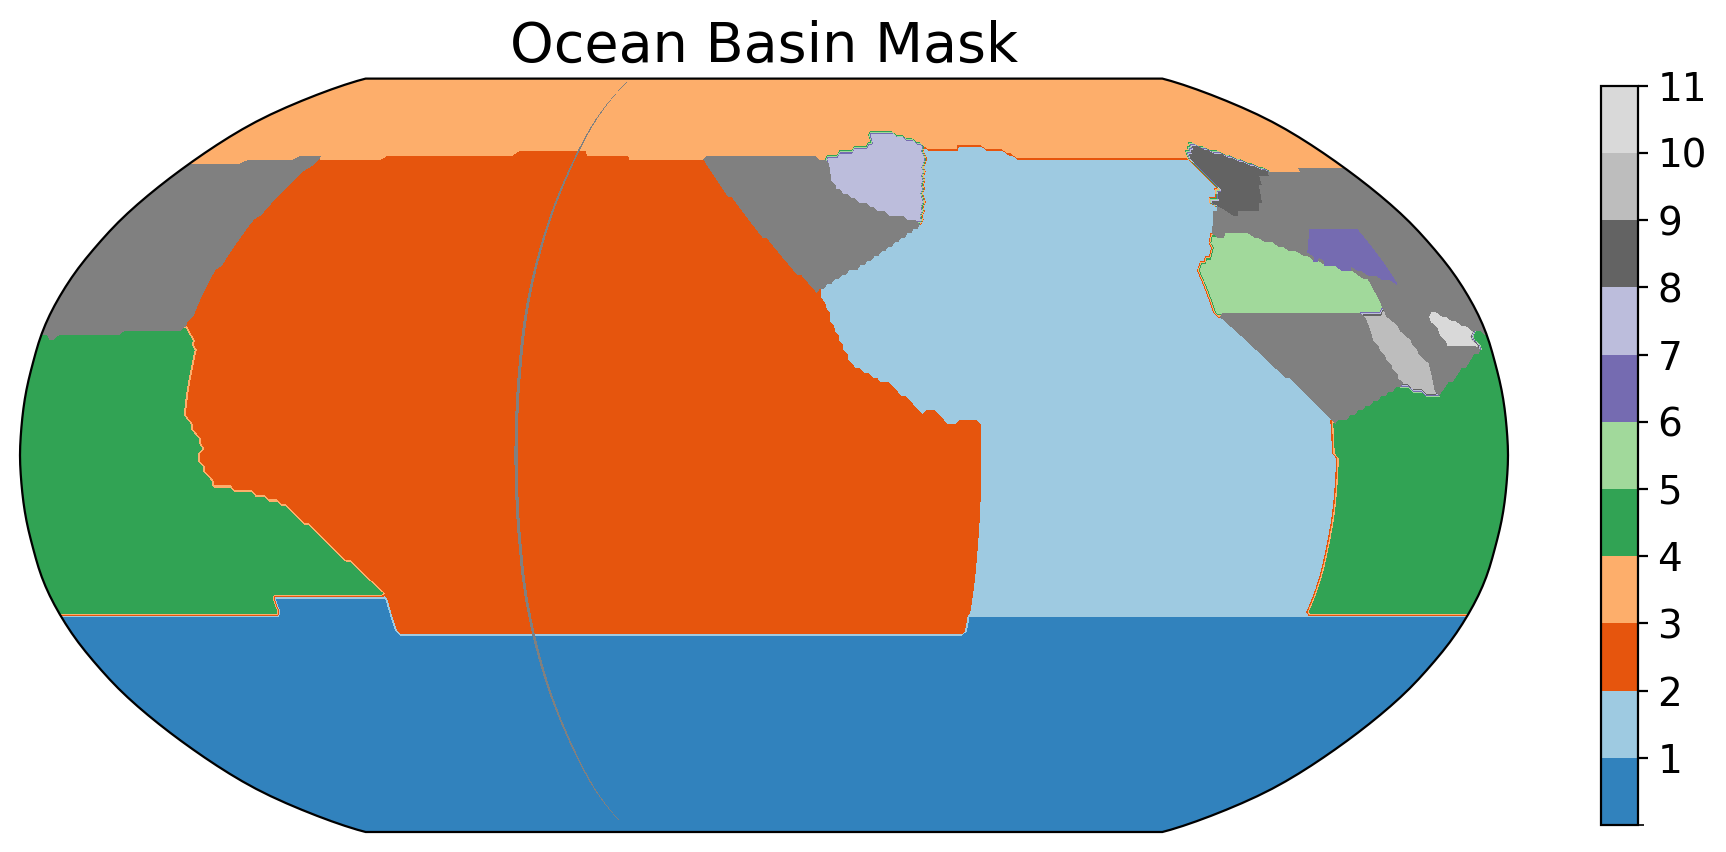

In [5]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

#### __Fig 1__ Representing the ocean mask of all basins sources from the Woa 18 Ocean Atlas data.

# Basins Number Correlations 

### For analysis at the basin scale, you will need the ocean basin mask provided below. This separates the global ocean into distinct basins identified by integer values such that:
## Southern Ocean = 1
## Atlantic Ocean = 2
## Pacific Ocean = 3
## Arctic Ocean = 4
## Indian Ocean = 5

In [6]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1))
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2))
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean =  (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))
indianocean =  (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5))

### __Independent Basins__

Text(0.5, 1.0, 'Ocean Basin Mask')

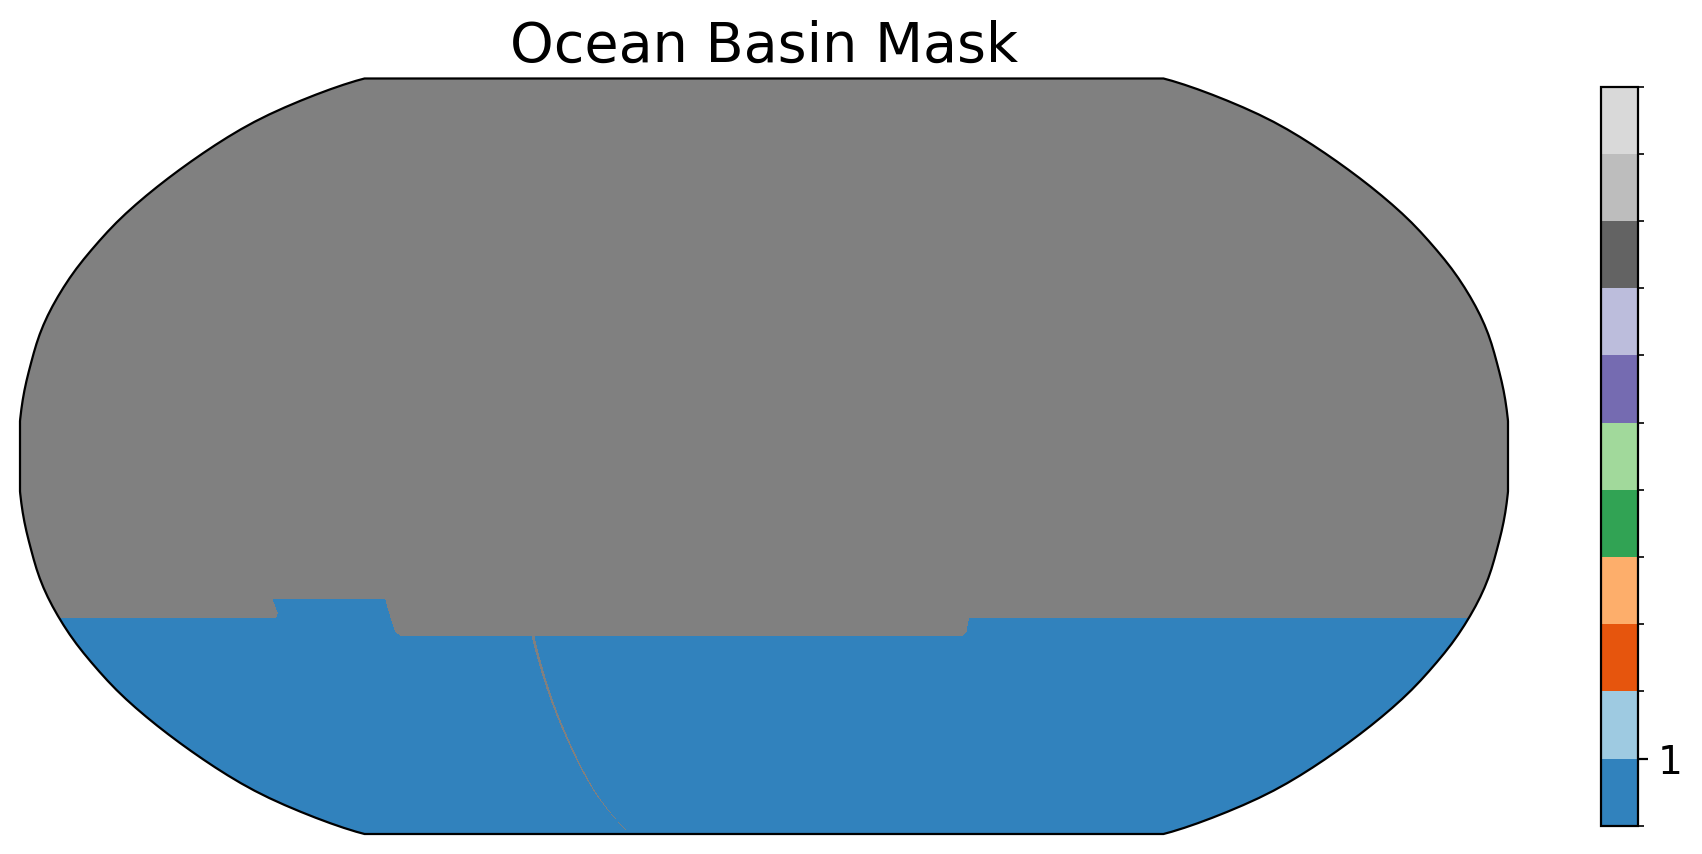

In [7]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

#### __Fig 2__ This highlighted ocean basin represents the Southern Ocean which is identified as basin #1. This mask is from the World Ocean Atlas 2018 data.

Text(0.5, 1.0, 'Ocean Basin Mask')

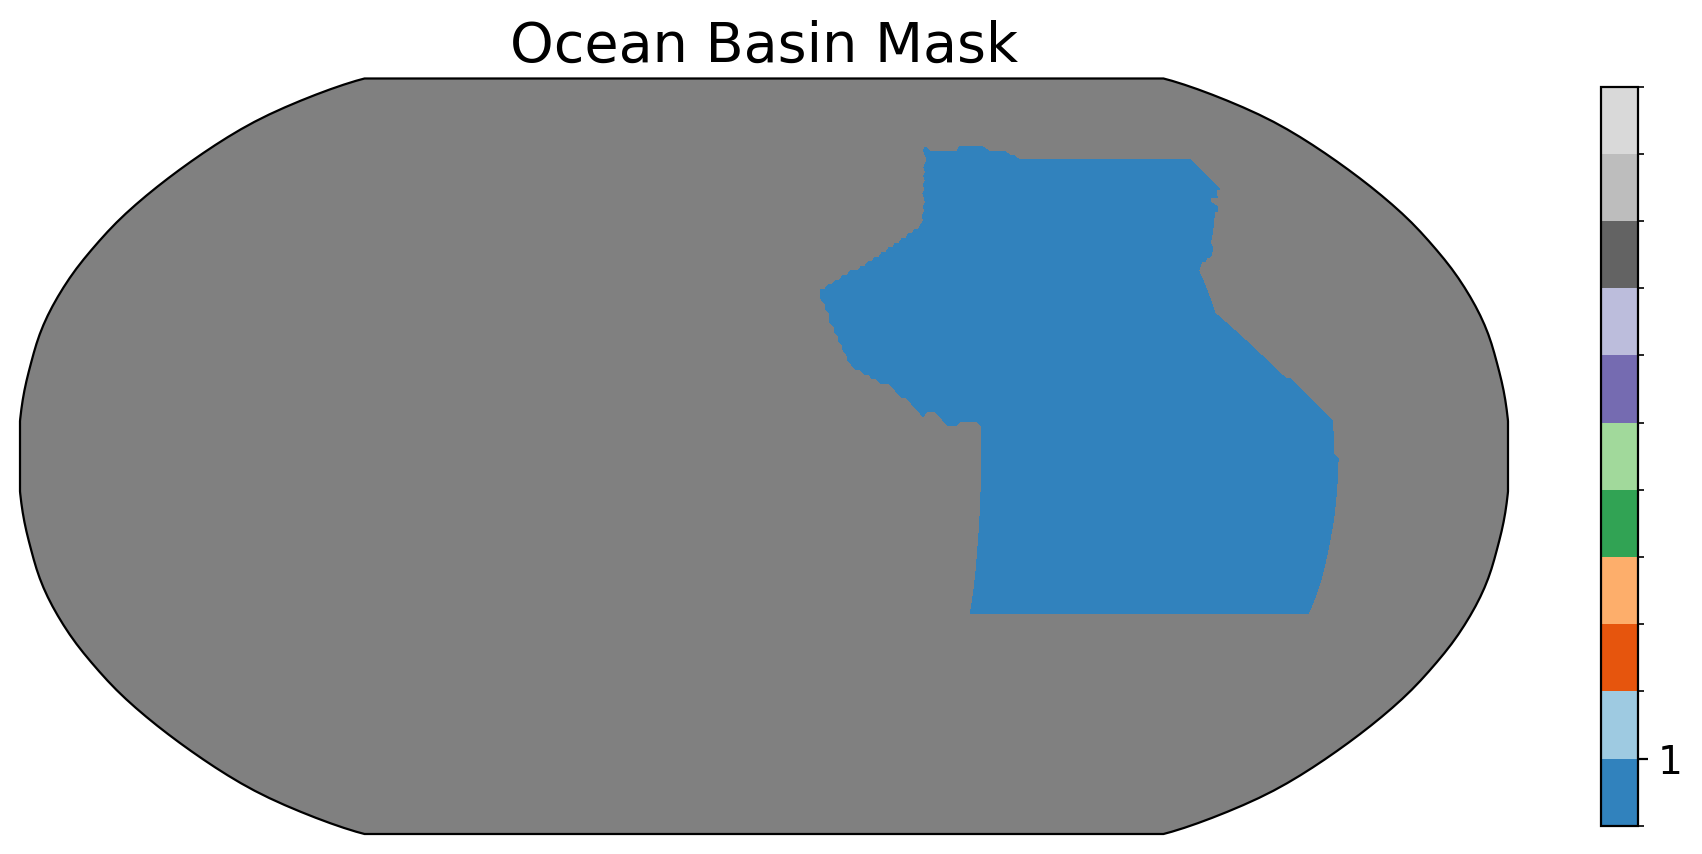

In [8]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = atlanticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

#### __Fig 3__ The highlighted ocean basin represents the Atlantic Ocean, which is identified as basin #2. This mask is from the World Ocean Atlas 2018 data.

Text(0.5, 1.0, 'Ocean Basin Mask')

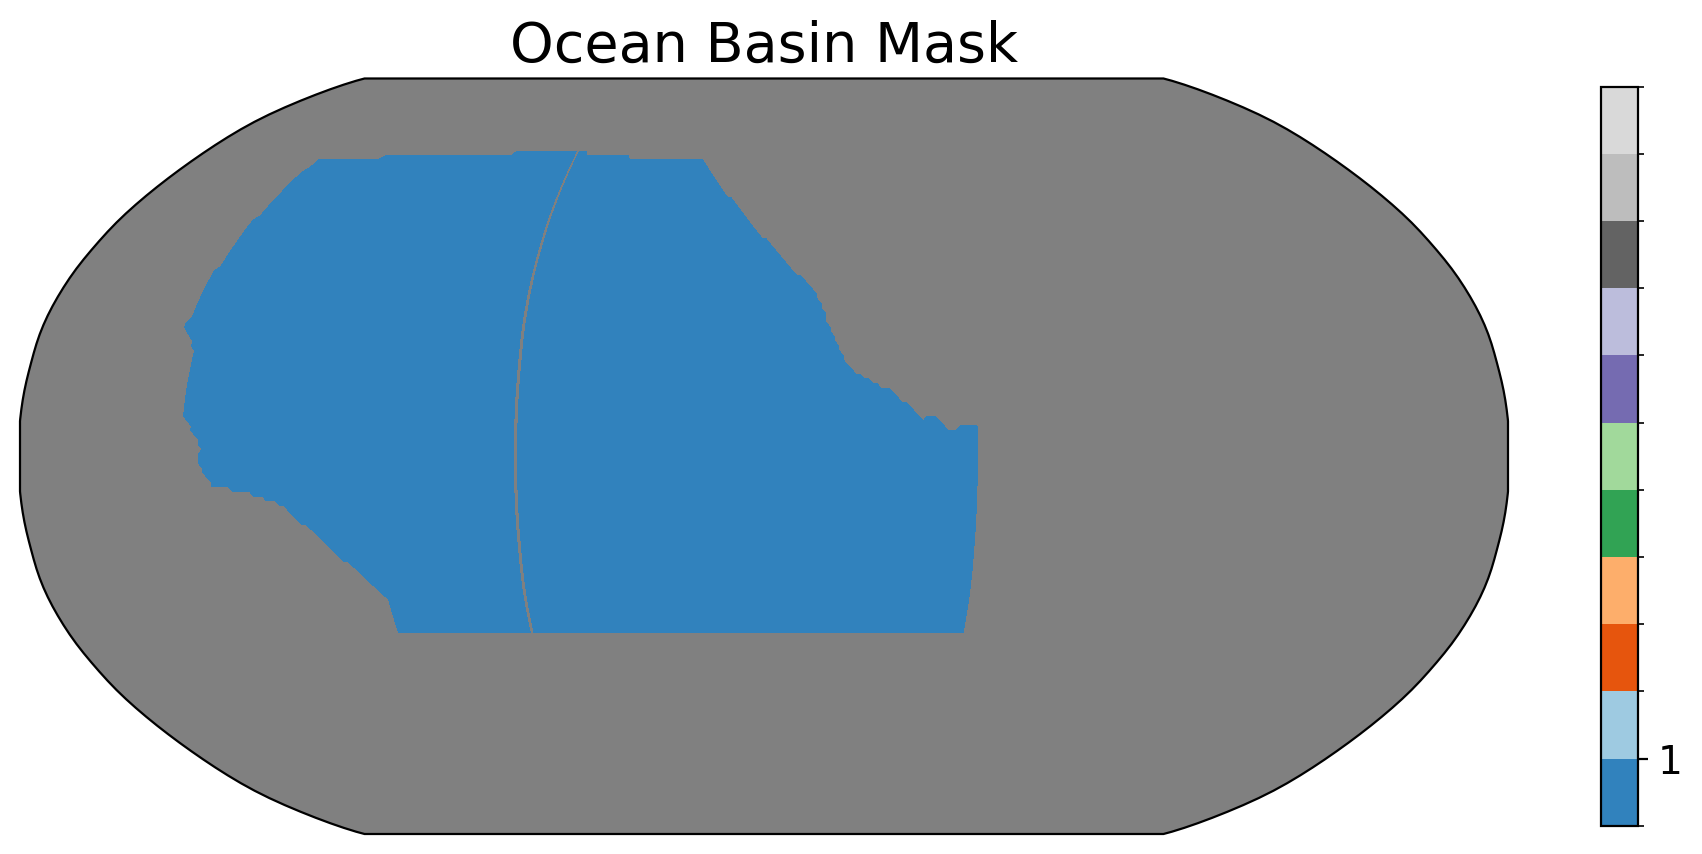

In [9]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = pacificocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

#### __Fig 4__ This highlighted ocean basin represents the Pacific Ocean, which is identified as basin #3. This mask is from the World Ocean Atlas 2018 data.

Text(0.5, 1.0, 'Ocean Basin Mask')

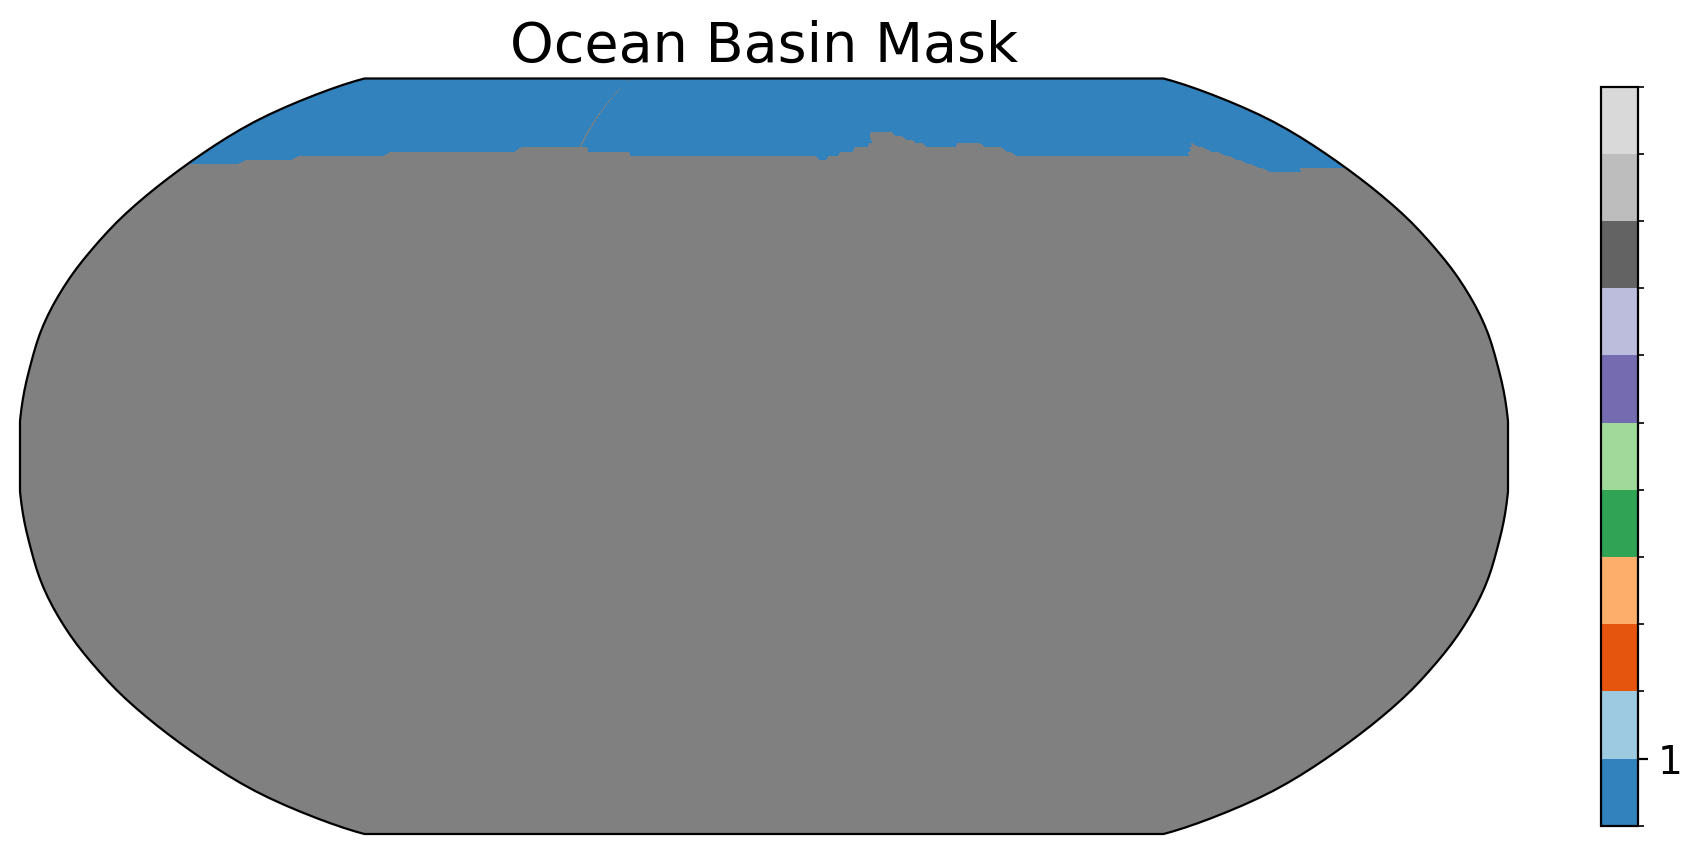

In [10]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = arcticocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

#### __Fig 5__ This highlighted ocean basin represents the Arctic Ocean which is identified as basin #4. This mask is from the World Ocean Atlas 2018 data.

Text(0.5, 1.0, 'Ocean Basin Mask')

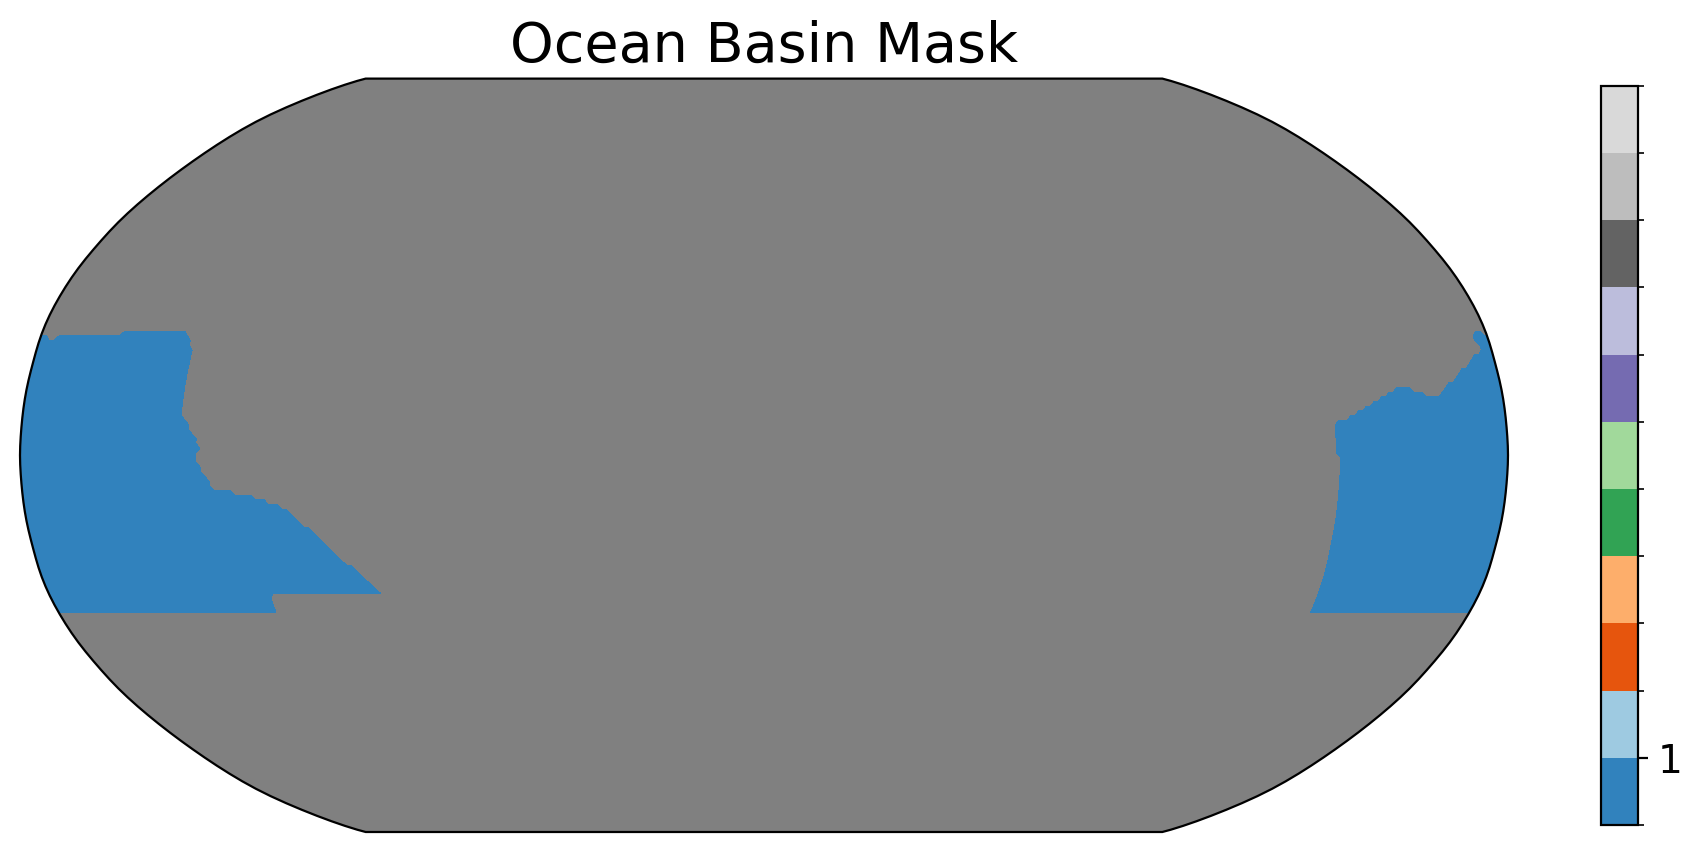

In [11]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = indianocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

#### __Fig 6__ This highlighted ocean basin represents the Indian Ocean which is identified as basin #5. This mask is from the World Ocean Atlas 2018 data. 

In [12]:
## Identifying labels

In [13]:
woa18_aou = xr.open_zarr('../data/woa18/woa_aou_all',decode_times=False).aou

In [14]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

In [15]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1))
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2))
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean =  (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))
indianocean =  (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5))

In [16]:
# WOA18 apparent oxygen utilization
woa18_aou_atlantic = woa18_aou*atlanticocean
woa18_aou_pacific = woa18_aou*pacificocean
woa18_aou_southern = woa18_aou*southernocean
woa18_aou_indian = woa18_aou*indianocean
woa18_aou_arctic = woa18_aou*arcticocean

#WOA18 oxygen saturation
woa18_sat_atlantic = woa18_o2_sat*atlanticocean
woa18_sat_pacific = woa18_o2_sat*pacificocean
woa18_sat_southern = woa18_o2_sat*southernocean
woa18_sat_indian = woa18_o2_sat*indianocean
woa18_sat_arctic = woa18_o2_sat*arcticocean

#WOA18 dissolved oxygen
woa18_o2_atlantic = woa18_o2*atlanticocean
woa18_o2_pacific = woa18_o2*pacificocean
woa18_o2_southern = woa18_o2*southernocean
woa18_o2_indian = woa18_o2*indianocean
woa18_o2_arctic = woa18_o2*arcticocean

In [17]:
o2_0 = woa18_o2_pacific.sel(lat=slice(-89.5,89.5))

In [18]:
aou_p = woa18_aou_pacific.sel(lon=-90,method='nearest')

In [19]:
## Loading in the ESM for Deeper modeling of Oxygen Analysis

In [20]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [21]:
# CMIP6, GFDL-ESM4 SSP 5-8.5 Yearly O2 Saturation
o2sat_year_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Oyr' &  \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

In [22]:
# CMIP6, GFDL-ESM4 SSP 5-8.5 Yearly Dissolved O2
o2_year_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Oyr' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'")

In [23]:
# Retrieves paths to specific zarr stores
gcs = gcsfs.GCSFileSystem(token='anon')
zstore_o2sat_y = o2sat_year_data.zstore.values[-1]
zstore_o2_y = o2_year_data.zstore.values[-1]

In [24]:
# create a mutable-mapping-style interface to the yearly o2 sat store
# Gettin, the mapper for Yearly O2 Sat, Dissolves, and AOU data from Google Cloud Storage
# Getting the  Yearly  O2 Sat, Dissolves, and AOU data using 'lat' to 'latitude' and 'lon' to 'longitude'
mapper_year = gcs.get_mapper(zstore_o2sat_y)
# open the dataset using xarray and zarr
o2sat_yearly = xr.open_zarr(mapper_year, 
                                consolidated=True,use_cftime=True).o2sat.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [25]:
# Create a mutable-mapping-style interface to the yearly dissolved o2 store
mapper_year = gcs.get_mapper(zstore_o2_y)
o2_yearly = xr.open_zarr(mapper_year, 
                                consolidated=True,use_cftime=True).o2.rename({'lat':'latitude',
                                                             'lon':'longitude'})

In [26]:
# Calculate Apparent Oxygen Utilization (AOU) for yearly & data. Assigning new names for the calculations 
aou_yearly=o2sat_yearly-o2_yearly

In [27]:
# Averaging and slicing the data to obtain the time series data for all O2, AOU, and Sat. 
#o2sat
o2sat_yearly_2015_2035=o2sat_yearly.isel(time=slice(0,21))
o2sat_mean_2015_2035=o2sat_yearly_2015_2035.mean(dim='time')
o2sat_yearly_2080_2100=o2sat_yearly.isel(time=slice(65,86))
o2sat_mean_2080_2100=o2sat_yearly_2080_2100.mean(dim='time')
o2sat_difference_lastminusfirst=o2sat_mean_2080_2100-o2sat_mean_2015_2035
#o2
o2_yearly_2015_2035=o2_yearly.isel(time=slice(0,21))
o2_mean_2015_2035=o2_yearly_2015_2035.mean(dim='time')
o2_yearly_2080_2100=o2_yearly.isel(time=slice(65,86))
o2_mean_2080_2100=o2_yearly_2080_2100.mean(dim='time')
o2_difference_lastminusfirst=o2_mean_2080_2100-o2_mean_2015_2035
#aou
aou_yearly_2015_2035=aou_yearly.isel(time=slice(0,21))
aou_mean_2015_2035=aou_yearly_2015_2035.mean(dim='time')
aou_yearly_2080_2100=aou_yearly.isel(time=slice(65,86))
aou_mean_2080_2100=aou_yearly_2080_2100.mean(dim='time')
aou_difference_lastminusfirst=aou_mean_2080_2100-aou_mean_2015_2035

___

___

# <span style="color:Navy"><u>__Modeling The Oceans Oxygen__ 

## <span style="color:gray">__Surface View of Depths (All Basins)__

### <span style="color:blue">__Oxygen Dissolved (Nadia)__

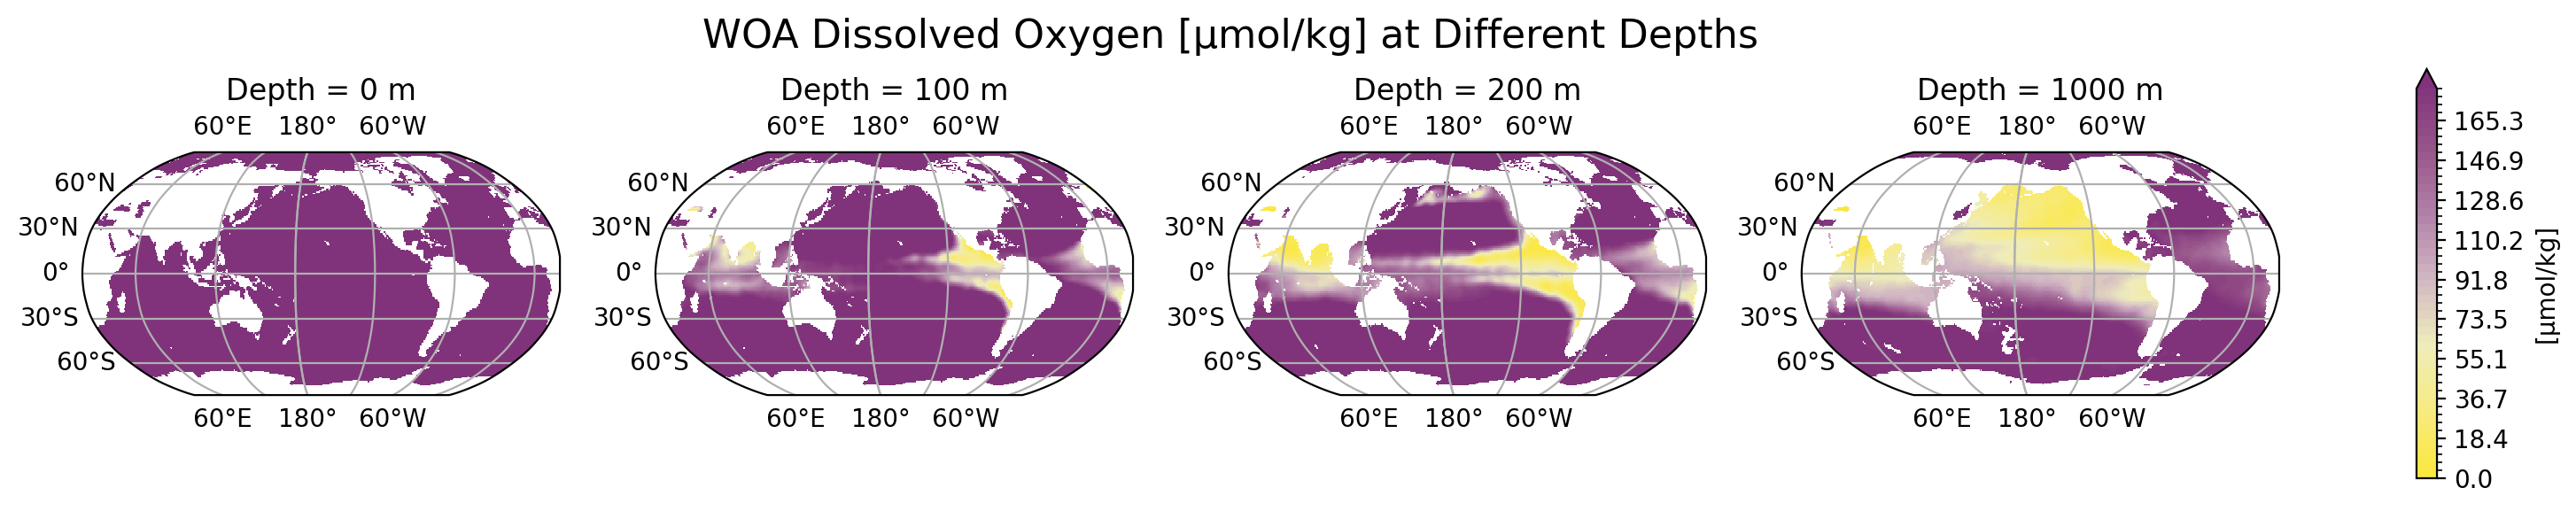

In [28]:
# Define subplot dict
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=200))
# Create a figure with 1 row and 4 columns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), subplot_kw=subplot_kws)
fig.text(0.3,0.75,"WOA Dissolved Oxygen [μmol/kg] at Different Depths",size=16)
# Plot for Depth = 0 m
p1 = woa18_o2.sel(depth=0).plot(ax=ax1,
                                 cmap=woce.oxygen,             #oxygen colormap from wocemaps
                                 vmin=0, vmax=180, levels=50,
                                 transform=ccrs.PlateCarree(), #apply projection to plot
                                 add_colorbar=False)
ax1.set_title("Depth = 0 m", fontsize=12)
ax1.gridlines(draw_labels=True)                                #add latitude and longitude gridlines
# Plot for Depth = 100 m
p2 = woa18_o2.sel(depth=100).plot(ax=ax2,
                                   cmap=woce.oxygen,
                                   vmin=0, vmax=180, levels=50,
                                   transform=ccrs.PlateCarree(),
                                   add_colorbar=False)
ax2.set_title("Depth = 100 m", fontsize=12)
ax2.gridlines(draw_labels=True)
# Plot for Depth = 200 m
p3 = woa18_o2.sel(depth=200).plot(ax=ax3,
                                   cmap=woce.oxygen,
                                   vmin=0, vmax=180, levels=50,
                                   transform=ccrs.PlateCarree(),
                                   add_colorbar=False)
ax3.set_title("Depth = 200 m", fontsize=12)
ax3.gridlines(draw_labels=True)
# Plot for Depth = 1000 m
p4 = woa18_o2.sel(depth=1000).plot(ax=ax4,
                                    cmap=woce.oxygen,
                                    vmin=0, vmax=180, levels=50,
                                    transform=ccrs.PlateCarree(),
                                    add_colorbar=False)
ax4.set_title("Depth = 1000 m", fontsize=12)
ax4.gridlines(draw_labels=True)
# colorbar
cb = fig.colorbar(p4, ax=[ax1, ax2, ax3, ax4], shrink=0.6)
cb.ax.tick_params(labelsize=10)
cb.set_label("[μmol/kg]")
plt.show()

**Figure 7.** Global ocean WOA18 Dissolved Oxygen (μmol/kg) at depths 0 m, 100 m, 200 m, 1000 m. Maps show all 5 ocean basins. Data is from World Ocean Atlas 2018 (WOA18) dataset.

## <span style="color:blue">__Oxygen Saturated (Beth)__

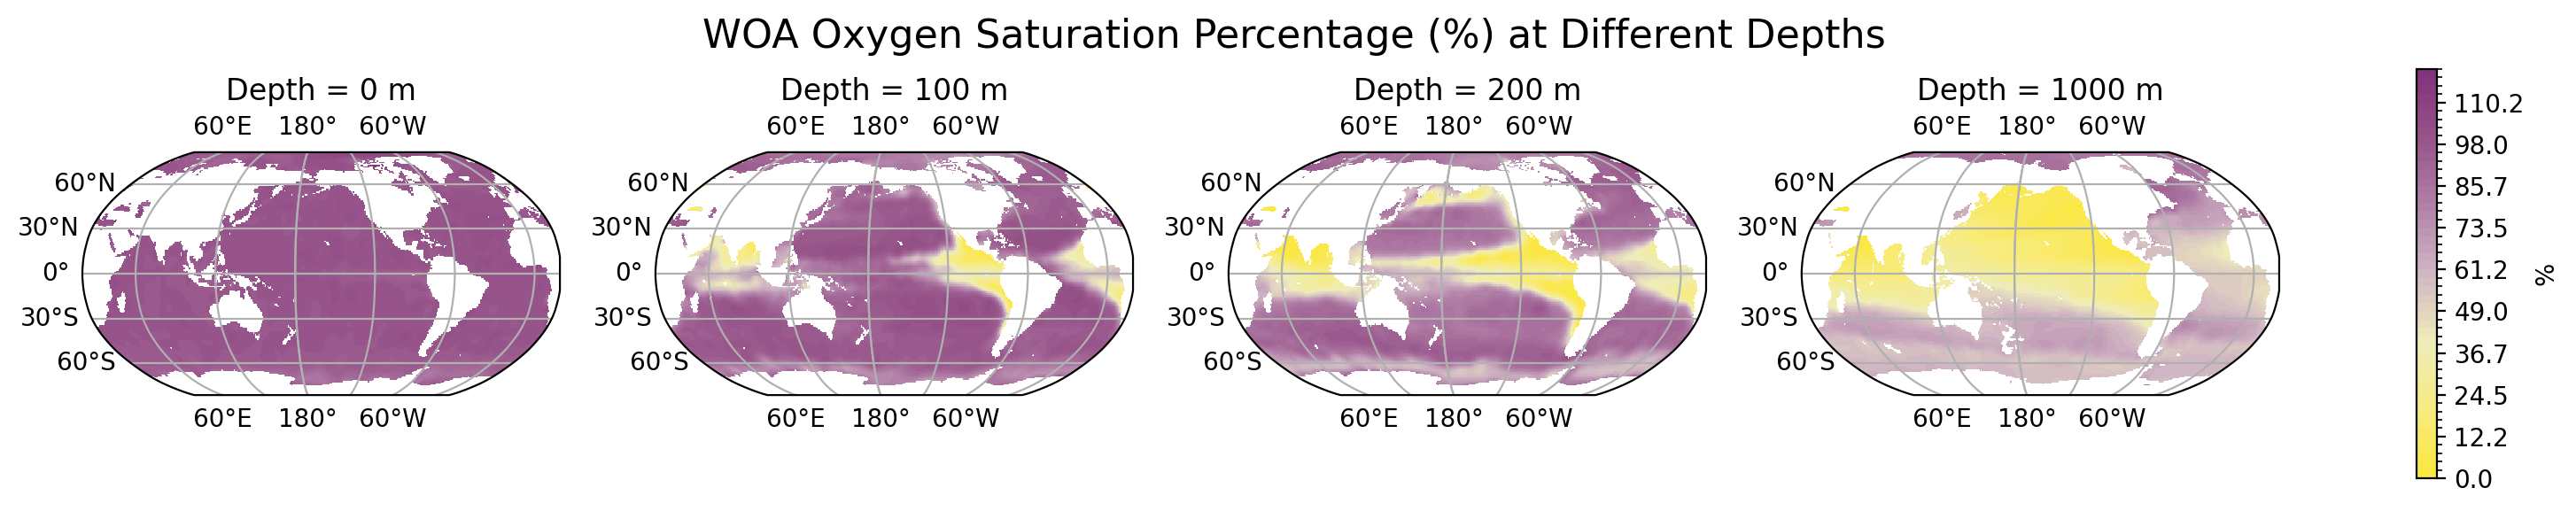

In [29]:
# Define subplot dict
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=200))
# Create a figure with 1 row and 4 columns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), subplot_kw=subplot_kws)
fig.text(0.3,0.75,"WOA Oxygen Saturation Percentage (%) at Different Depths",size=16)
# Plot for Depth = 0 m
p1 = woa18_o2_sat.sel(depth=0).plot(ax=ax1,
                                 cmap=woce.oxygen,
                                 vmin=0, vmax=120, levels=50,
                                 transform=ccrs.PlateCarree(),
                                 add_colorbar=False)
ax1.set_title("Depth = 0 m", fontsize=12)
ax1.gridlines(draw_labels=True)
# Plot for Depth = 100 m
p2 = woa18_o2_sat.sel(depth=100).plot(ax=ax2,
                                   cmap=woce.oxygen,
                                   vmin=0, vmax=120, levels=50,
                                   transform=ccrs.PlateCarree(),
                                   add_colorbar=False)
ax2.set_title("Depth = 100 m", fontsize=12)
ax2.gridlines(draw_labels=True)
# Plot for Depth = 200 m
p3 = woa18_o2_sat.sel(depth=200).plot(ax=ax3,
                                   cmap=woce.oxygen,
                                   vmin=0, vmax=120, levels=50,
                                   transform=ccrs.PlateCarree(),
                                   add_colorbar=False)
ax3.set_title("Depth = 200 m", fontsize=12)
ax3.gridlines(draw_labels=True)
# Plot for Depth = 1000 m
p4 = woa18_o2_sat.sel(depth=1000).plot(ax=ax4,
                                    cmap=woce.oxygen,
                                    vmin=0, vmax=120, levels=50,
                                    transform=ccrs.PlateCarree(),
                                    add_colorbar=False)
ax4.set_title("Depth = 1000 m", fontsize=12)
ax4.gridlines(draw_labels=True)
# colorbar
cb = fig.colorbar(p4, ax=[ax1, ax2, ax3, ax4], shrink = 0.6)
cb.ax.tick_params(labelsize=10)
cb.set_label("%")
plt.show()

**Figure 8.** Global ocean WOA18 Oxygen Saturation Percentage (%) at depths 0 m, 100 m, 200 m, 1000 m. Maps show all 5 ocean basins. Data is from World Ocean Atlas 2018 (WOA18) dataset.

### <span style="color:blue">__Apparent Oxygen Utilization (Megan)__

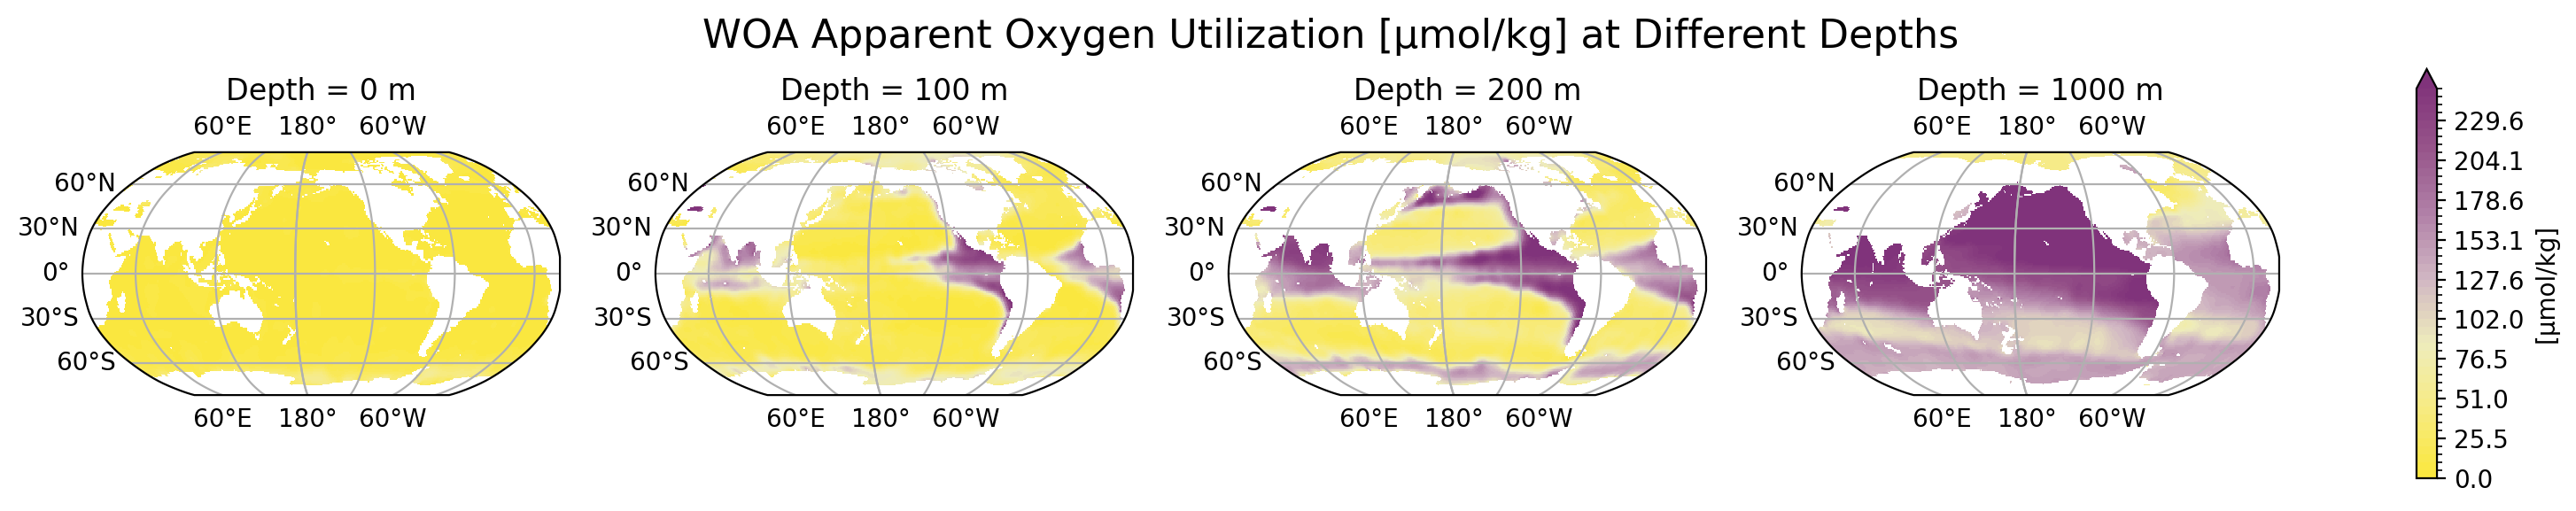

In [30]:
# Define subplot dict
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=200))
# Create a figure with 1 row and 4 columns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), subplot_kw=subplot_kws)
fig.text(0.3,0.75,"WOA Apparent Oxygen Utilization [μmol/kg] at Different Depths",size=16)
# Plot for Depth = 0 m
p1 = woa18_aou.sel(depth=0).plot(ax=ax1,
                                 cmap=woce.oxygen,
                                 vmin=0, vmax=250, levels=50,
                                 transform=ccrs.PlateCarree(),
                                 add_colorbar=False)
ax1.set_title("Depth = 0 m", fontsize=12)
ax1.gridlines(draw_labels=True)
# Plot for Depth = 100 m
p2 = woa18_aou.sel(depth=100).plot(ax=ax2,
                                   cmap=woce.oxygen,
                                   vmin=0, vmax=250, levels=50,
                                   transform=ccrs.PlateCarree(),
                                   add_colorbar=False)
ax2.set_title("Depth = 100 m", fontsize=12)
ax2.gridlines(draw_labels=True)
# Plot for Depth = 200 m
p3 = woa18_aou.sel(depth=200).plot(ax=ax3,
                                   cmap=woce.oxygen,
                                   vmin=0, vmax=250, levels=50,
                                   transform=ccrs.PlateCarree(),
                                   add_colorbar=False)
ax3.set_title("Depth = 200 m", fontsize=12)
ax3.gridlines(draw_labels=True)
# Plot for Depth = 1000 m
p4 = woa18_aou.sel(depth=1000).plot(ax=ax4,
                                    cmap=woce.oxygen,
                                    vmin=0, vmax=250, levels=50,
                                    transform=ccrs.PlateCarree(),
                                    add_colorbar=False)
ax4.set_title("Depth = 1000 m", fontsize=12)
ax4.gridlines(draw_labels=True)
# colorbar
cb = fig.colorbar(p4, ax=[ax1, ax2, ax3, ax4], shrink = 0.6)
cb.ax.tick_params(labelsize=10)
cb.set_label("[μmol/kg]")
plt.show()

___

**Figure 9.** Global ocean WOA18 Apparent Oxygen Utilization (AOU) (μmol/kg) at depths 0 m, 100 m, 200 m, 1000 m. Maps show all five ocean basins. Data is from the World Ocean Atlas 2018 (WOA18) dataset.

___

#### <span style="color:gray">__What does the WOA Data Display?__

#### The World Ocean Atlas 2018 (WOA18) provides a baseline state of dissolved oxygen and cross-sectional data. The WOA is a collection of in situ biogeochemical and hydrographic observations. The 2018 edition includes data on dissolved oxygen, percent oxygen saturation, and apparent oxygen utilization.  Plots of these fields illustrate the typical distribution of oxygen in the world's oceans. By analyzing these graphs, we can identify areas with high oxygen levels, which helps us predict potential oxygen loss or gain. This understanding is essential for assessing where and how oxygen levels are changing globally.  The baseline data is particularly important because, for climate science, it serves as a starting point for effectively understanding and analyzing changes in oxygen levels over time.These trends show that at 0 depth, the oxygen is constantly replenished; however, as we dive to different depths, the oxygen dissolved and utilized varies drastically.

___

# <span style="color:Navy"><u> __Time Series and Earth System Model (4) Analysis__ 

## <span style="color:gray">__Projected Comparisons__

In [31]:
esm4_basins = xr.open_dataset('../data/basins/esm4_basins_gr.nc').basins


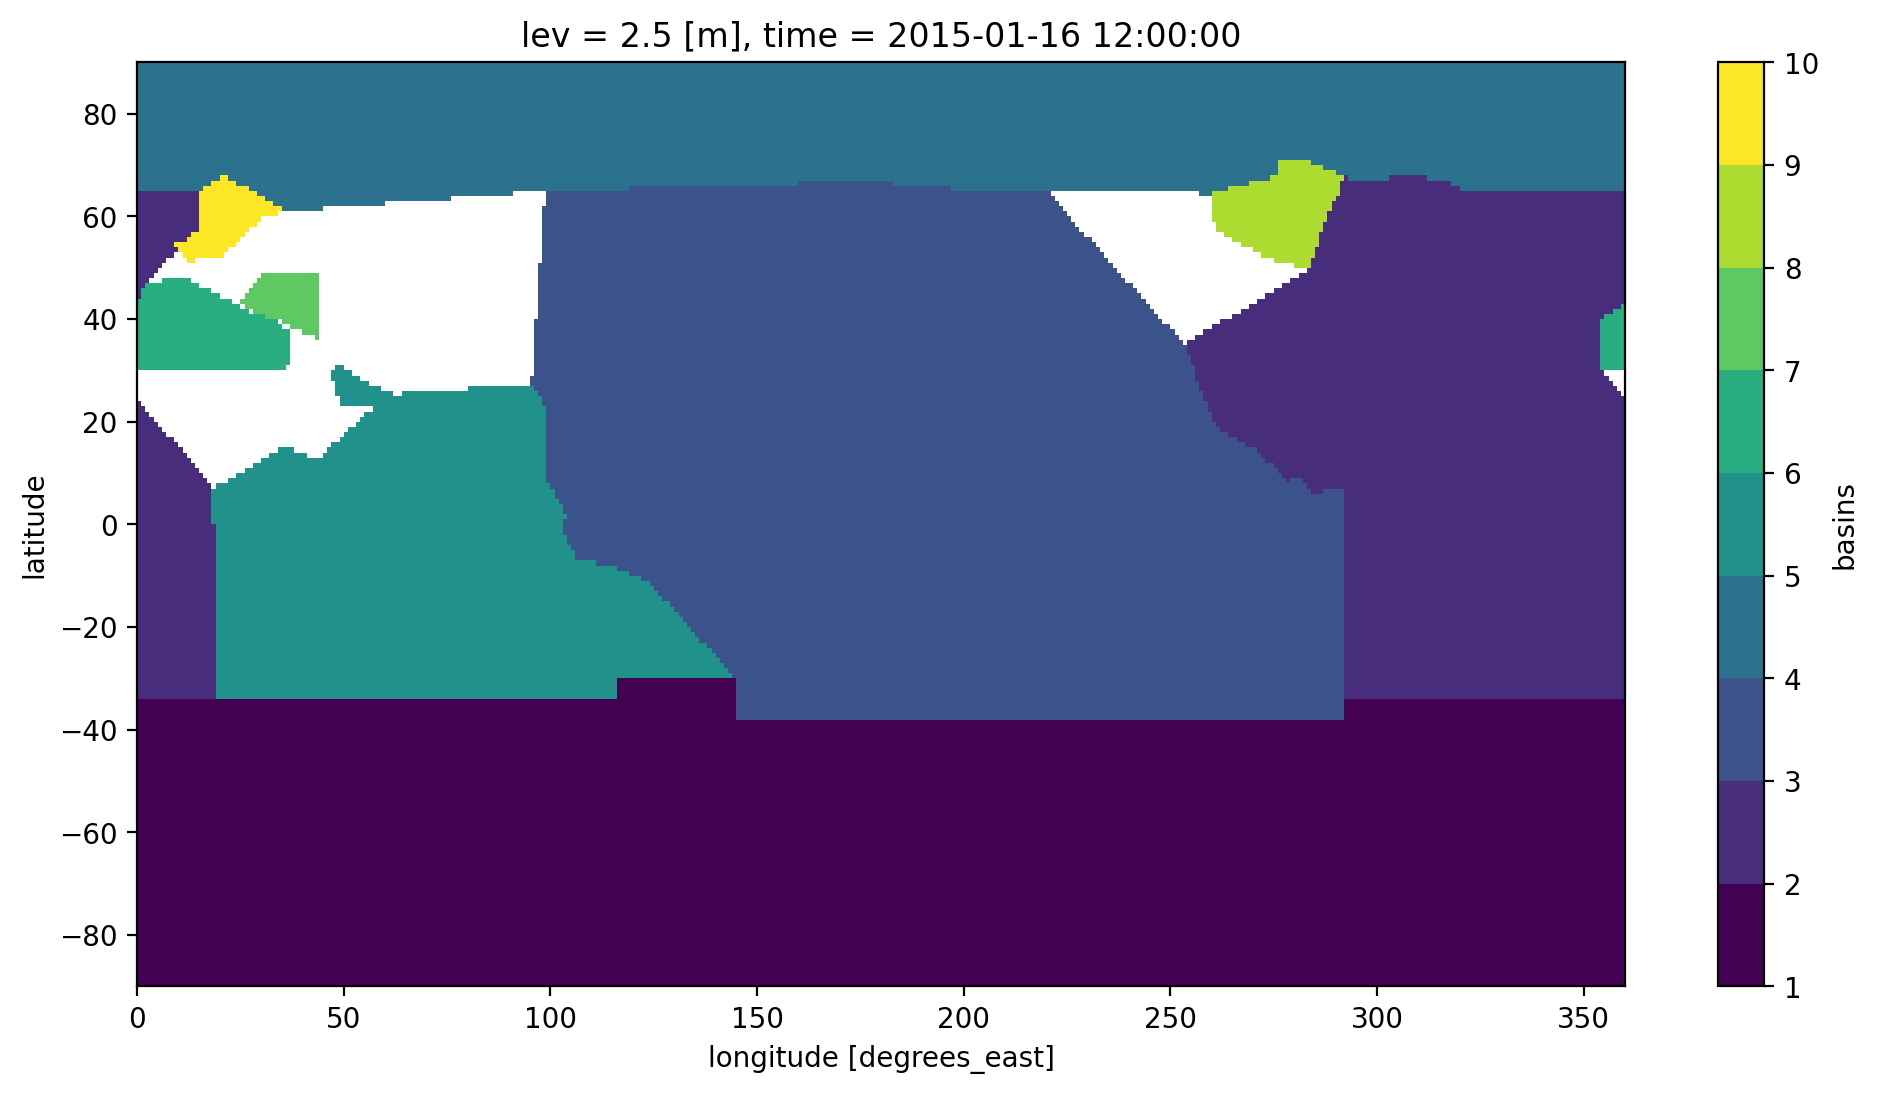

In [32]:
esm4_basins.plot(levels=10) #mask to the basins being used 

**Figure 10.** From the WOA 18 data set reassigning the calculated basins

In [33]:
# reassiging basins and calc
esmsouthernocean =(esm4_basins.where(esm4_basins==1) /  esm4_basins.where(esm4_basins==1))
esmatlanticocean =(esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2))
esmpacificocean = (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3))
esmarcticocean =  (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4))
esmindianocean =  (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5))

In [34]:
esm4_o2_atlantic = o2_yearly*esmatlanticocean
esm4_o2_pacific = o2_yearly*esmpacificocean
esm4_o2_southern = o2_yearly*esmsouthernocean
esm4_o2_indian = o2_yearly*esmindianocean
esm4_o2_arctic = o2_yearly*esmarcticocean

esm4_o2sat_atlantic = o2sat_yearly*esmatlanticocean #o2sat data in the Atlantic
esm4_o2sat_pacific = o2sat_yearly*esmpacificocean
esm4_o2sat_southern = o2sat_yearly*esmsouthernocean
esm4_o2sat_indian = o2sat_yearly*esmindianocean
esm4_o2sat_arctic = o2sat_yearly*esmarcticocean

esm4_aou_atlantic = aou_yearly*esmatlanticocean
esm4_aou_pacific = aou_yearly*esmpacificocean
esm4_aou_southern = aou_yearly*esmsouthernocean
esm4_aou_indian = aou_yearly*esmindianocean
esm4_aou_arctic = aou_yearly*esmarcticocean

___

### <span style="color:blue">__Dissolved Oxygen Utilization (Nadia)__

Text(0.3, 0.75, 'Projected change in dissolved O2 [μmol/kg] from 2015 to 2100')

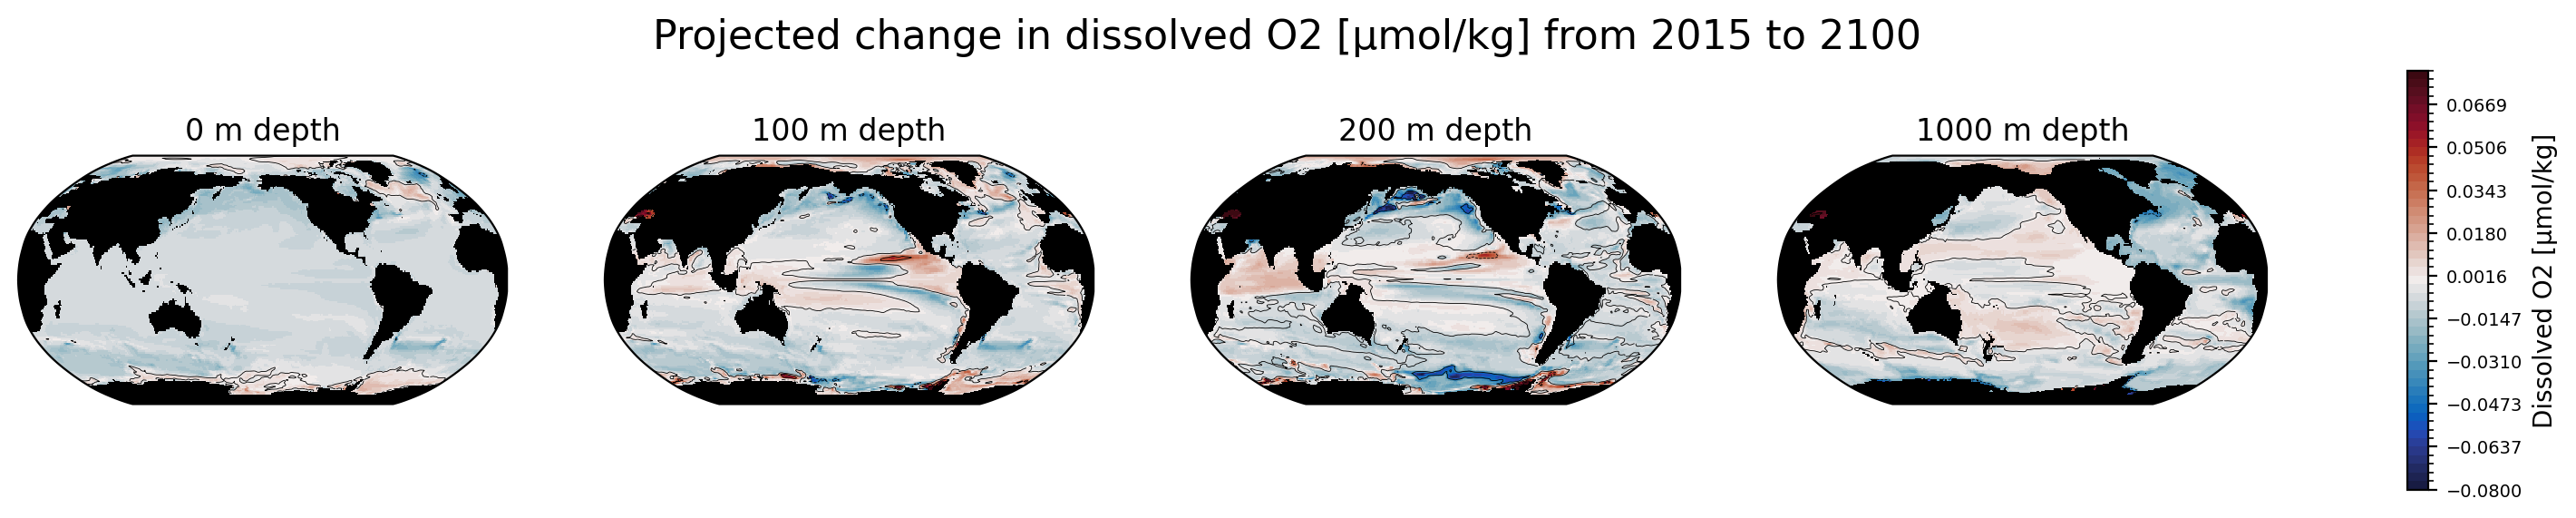

In [35]:
# Define subplot dict

subplot_kws = dict(projection=ccrs.Robinson(central_longitude=200),facecolor='black')
# Create a figure with 1 row and 4 columns

fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(20,5),ncols=4,nrows=1,subplot_kw=subplot_kws)
axlist=[ax1,ax2,ax3,ax4]

#Assign difference dataset to 4 subplots, separated by depths (levels) 0,100,200,1000

p=o2_difference_lastminusfirst.sel(lev=0,method='nearest').plot(ax=ax1,vmin=-0.08,vmax=0.08,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
o2_difference_lastminusfirst.sel(lev=0,method='nearest').plot.contour(ax=ax1,vmin=-0.08,vmax=0.08,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())

o2_difference_lastminusfirst.sel(lev=100,method='nearest').plot(ax=ax2,vmin=-0.08,vmax=0.08,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
o2_difference_lastminusfirst.sel(lev=100,method='nearest').plot.contour(ax=ax2,vmin=-0.08,vmax=0.08,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())

o2_difference_lastminusfirst.sel(lev=200,method='nearest').plot(ax=ax3,vmin=-0.08,vmax=0.08,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
aou_difference_lastminusfirst.sel(lev=200,method='nearest').plot.contour(ax=ax3,vmin=-0.08,vmax=0.08,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())

o2_difference_lastminusfirst.sel(lev=1000,method='nearest').plot(ax=ax4,vmin=-0.08,vmax=0.08,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
o2_difference_lastminusfirst.sel(lev=1000,method='nearest').plot.contour(ax=ax4,vmin=-0.08,vmax=0.08,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())
#colorbar

cb = plt.colorbar(p,shrink=0.6,ax=axlist)
cb.ax.tick_params(labelsize=7)
cb.set_label(label='Dissolved O2 [μmol/kg]')
#subplot titles

ax1.set_title("0 m depth")
ax2.set_title("100 m depth")
ax3.set_title("200 m depth")
ax4.set_title("1000 m depth")
#figure title

fig.text(0.3,0.75,"Projected change in dissolved O2 [μmol/kg] from 2015 to 2100",size=16)

**Figure 11 .** Projected global ocean change in Dissolved Oxygen (O2) (μmol/kg) at depths 0 m, 100 m, 200 m, and 1000 m, years 2015-2100. Maps show all 5 ocean basins. Data is from World Ocean Atlas 2018 (WOA18) dataset.

Text(0.5, 0, 'Year')

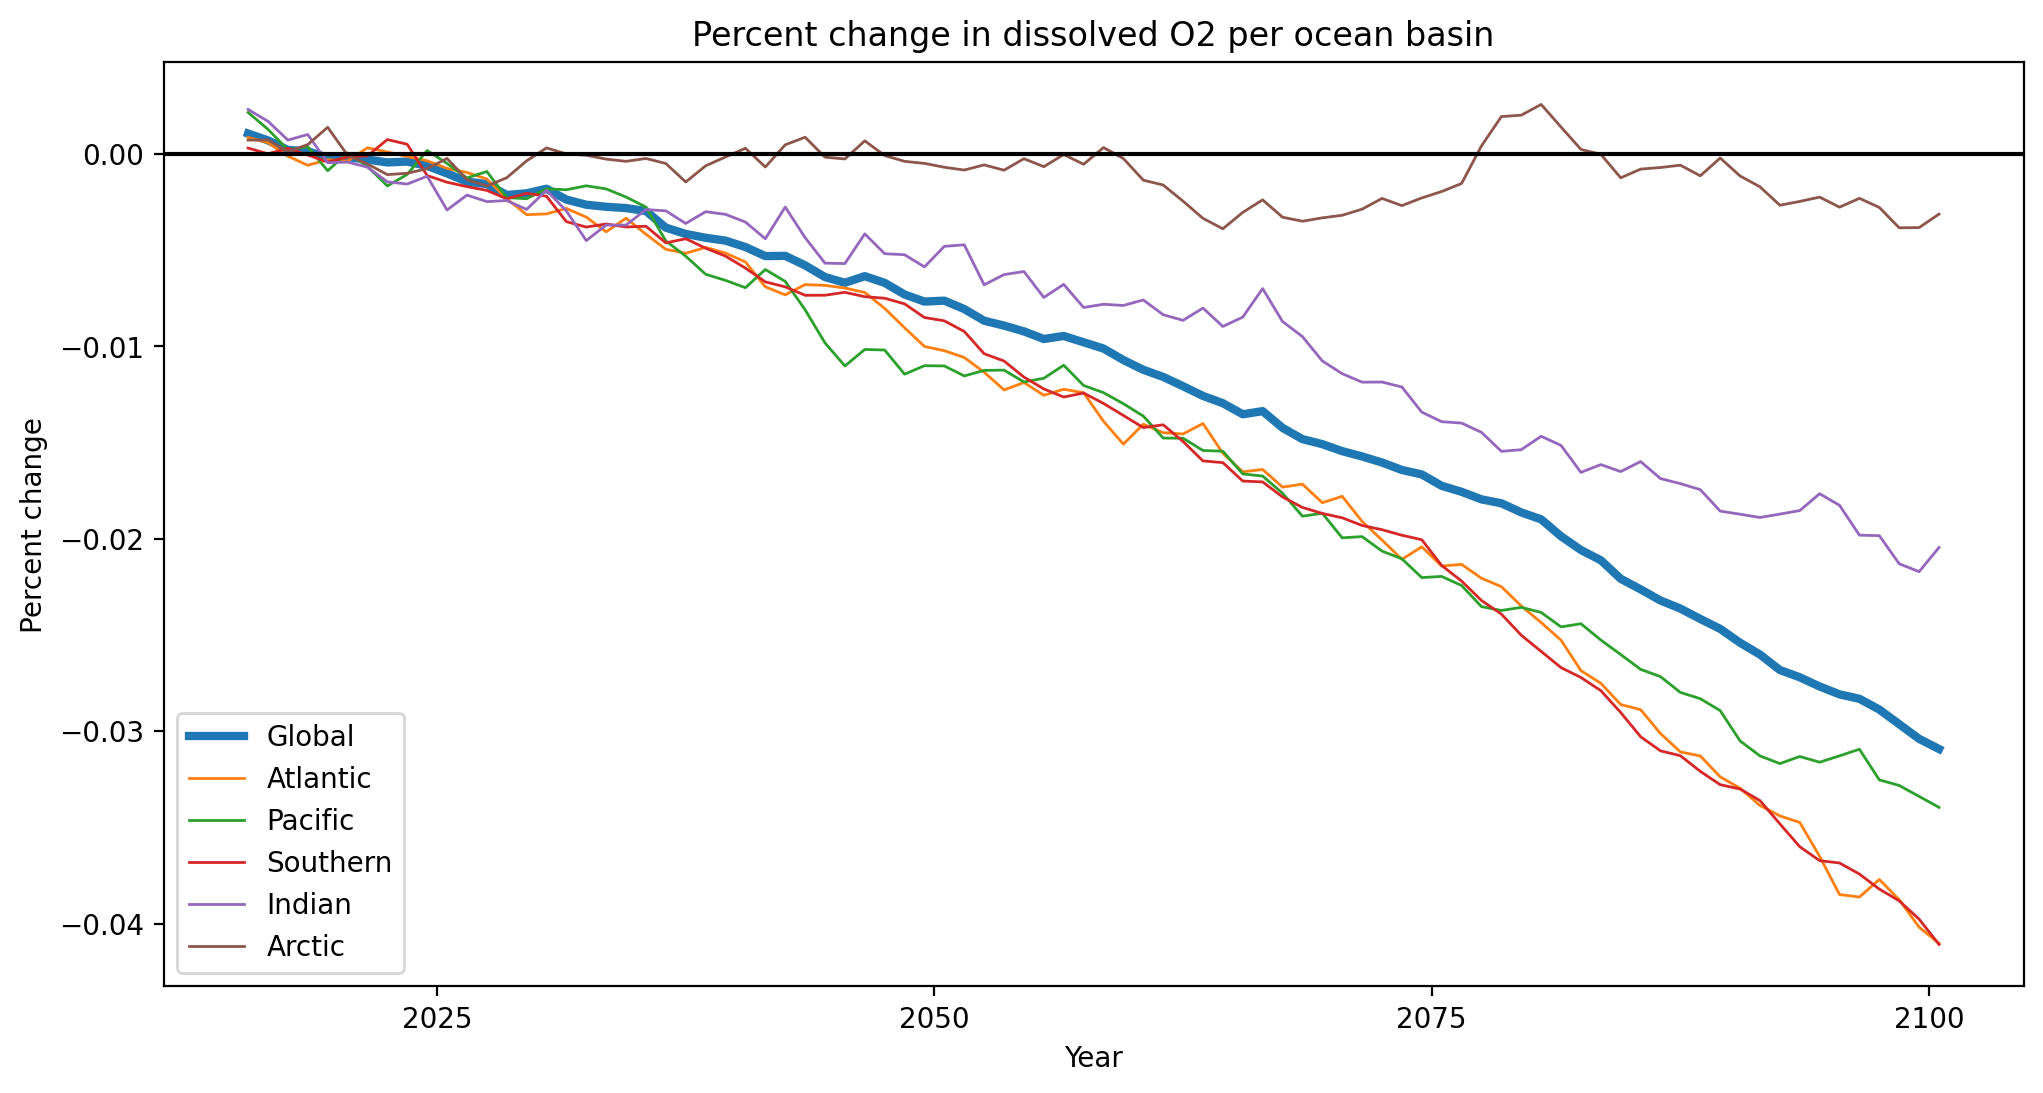

In [36]:
sum_o2_global=o2_yearly.sum(dim=['latitude','longitude','lev']) #takes the sum of o2 content throughout the column per year, throughout the entire time
baseline_o2_global=o2_yearly.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time') #takes sum of o2 content throughout the column per year, for the first 10 years, and takes a mean to be used as a baseline
percentchange_o2_global=(sum_o2_global-baseline_o2_global)/baseline_o2_global #the percent change is (datapoint-baseline)/baseline

sum_o2_atlantic=esm4_o2_atlantic.sum(dim=['latitude','longitude','lev']) #repeat the process for each basin
baseline_o2_atlantic=esm4_o2_atlantic.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2_atlantic=(sum_o2_atlantic-baseline_o2_atlantic)/baseline_o2_atlantic

sum_o2_pacific=esm4_o2_pacific.sum(dim=['latitude','longitude','lev'])
baseline_o2_pacific=esm4_o2_pacific.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2_pacific=(sum_o2_pacific-baseline_o2_pacific)/baseline_o2_pacific

sum_o2_southern=esm4_o2_southern.sum(dim=['latitude','longitude','lev'])
baseline_o2_southern=esm4_o2_southern.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2_southern=(sum_o2_southern-baseline_o2_southern)/baseline_o2_southern

sum_o2_indian=esm4_o2_indian.sum(dim=['latitude','longitude','lev'])
baseline_o2_indian=esm4_o2_indian.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2_indian=(sum_o2_indian-baseline_o2_indian)/baseline_o2_indian

sum_o2_arctic=esm4_o2_arctic.sum(dim=['latitude','longitude','lev'])
baseline_o2_arctic=esm4_o2_arctic.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2_arctic=(sum_o2_arctic-baseline_o2_arctic)/baseline_o2_arctic
fig,ax=plt.subplots()

percentchange_o2_global.plot(ax=ax,linewidth=3,label="Global") #specifies axis, linewidth, and label
percentchange_o2_atlantic.plot(ax=ax,linewidth=1,label="Atlantic")
percentchange_o2_pacific.plot(ax=ax,linewidth=1,label="Pacific")
percentchange_o2_southern.plot(ax=ax,linewidth=1,label="Southern")
percentchange_o2_indian.plot(ax=ax,linewidth=1,label="Indian")
percentchange_o2_arctic.plot(ax=ax,linewidth=1,label="Arctic")
ax.axhline(0,color="black") #adds a line at 0, for 0% change
ax.legend() #adds a legend

ax.set_title("Percent change in dissolved O2 per ocean basin") 
ax.set_ylabel("Percent change")
ax.set_xlabel("Year")

**Figure 12.** Time series plot based on the ESM4 data depicts trends from each basin, showing the percent change in dissolved oxygen.

### <span style="color:blue">__Oxygen Saturated (Beth)__

Text(0.3, 0.75, 'Projected change in saturated O2 [μmol/kg] from 2015 to 2100')

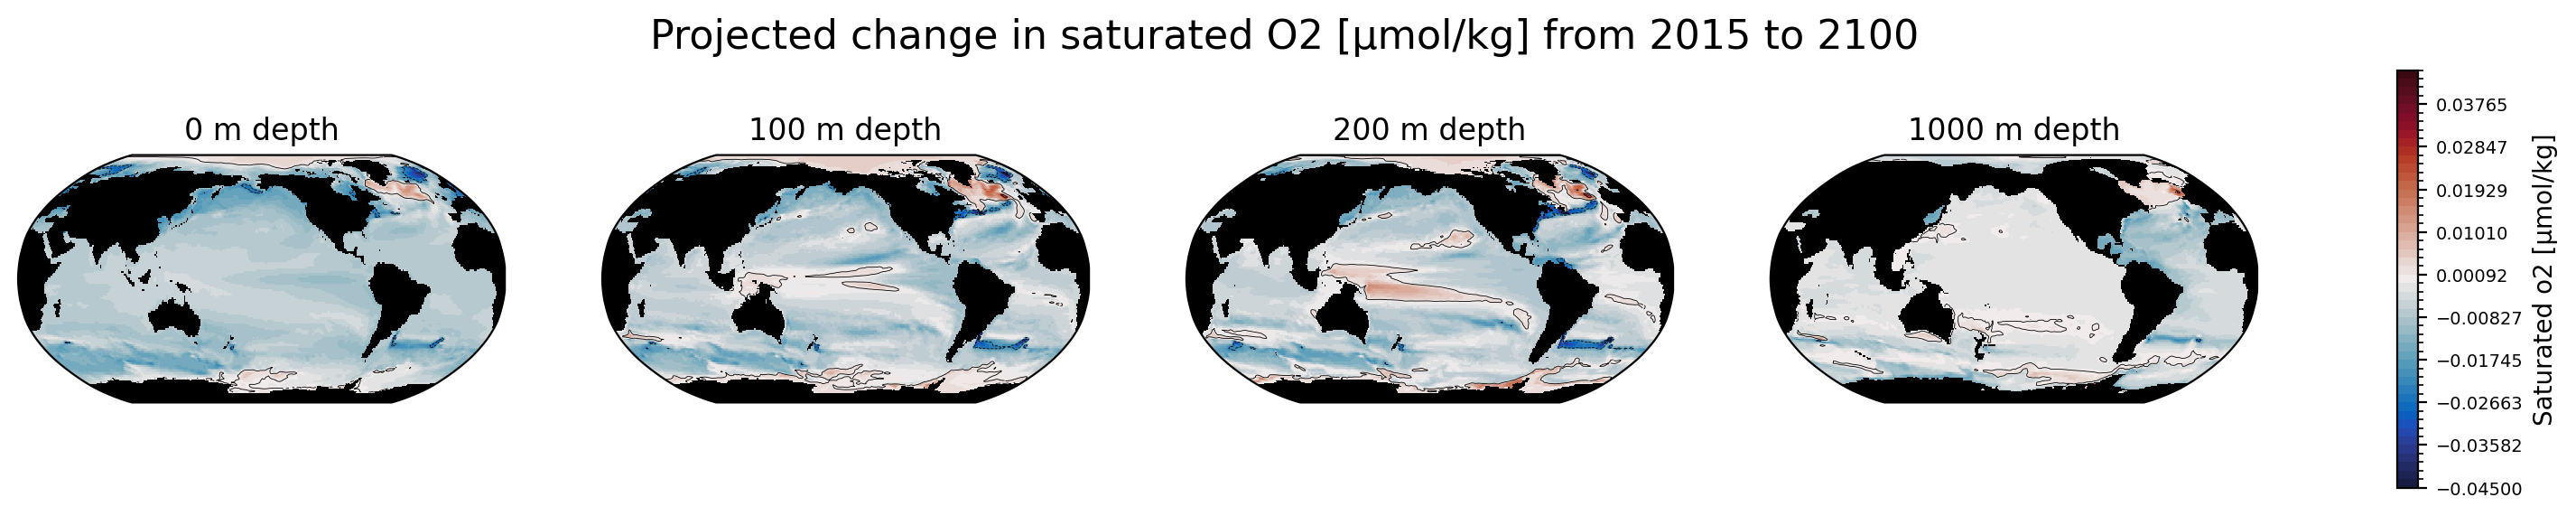

In [37]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=200),facecolor='black')
fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(20,5),ncols=4,nrows=1,subplot_kw=subplot_kws)
axlist=[ax1,ax2,ax3,ax4]

p=o2sat_difference_lastminusfirst.sel(lev=0,method='nearest').plot(ax=ax1,vmin=-0.045,vmax=0.045,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
o2sat_difference_lastminusfirst.sel(lev=0,method='nearest').plot.contour(ax=ax1,vmin=-0.045,vmax=0.045,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())

o2sat_difference_lastminusfirst.sel(lev=100,method='nearest').plot(ax=ax2,vmin=-0.045,vmax=0.045,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
o2sat_difference_lastminusfirst.sel(lev=100,method='nearest').plot.contour(ax=ax2,vmin=-0.045,vmax=0.045,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())

o2sat_difference_lastminusfirst.sel(lev=200,method='nearest').plot(ax=ax3,vmin=-0.045,vmax=0.045,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
o2sat_difference_lastminusfirst.sel(lev=200,method='nearest').plot.contour(ax=ax3,vmin=-0.045,vmax=0.045,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())

o2sat_difference_lastminusfirst.sel(lev=1000,method='nearest').plot(ax=ax4,vmin=-0.045,vmax=0.045,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
o2sat_difference_lastminusfirst.sel(lev=1000,method='nearest').plot.contour(ax=ax4,vmin=-0.045,vmax=0.045,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())

cb = plt.colorbar(p,shrink=0.6,ax=axlist)
cb.ax.tick_params(labelsize=7)
cb.set_label(label='Saturated o2 [μmol/kg]')

ax1.set_title("0 m depth")
ax2.set_title("100 m depth")
ax3.set_title("200 m depth")
ax4.set_title("1000 m depth")

fig.text(0.3,0.75,"Projected change in saturated O2 [μmol/kg] from 2015 to 2100",size=16)

**Figure 13 .** Projected global ocean change in oxygen saturation (percent) at depths 0 m, 100 m, 200 m, and 1000 m, years 2015-2100. Maps show all 5 ocean basins. Data is from World Atlas 2018 (WOA18) dataset.

Text(0.5, 0, 'Year')

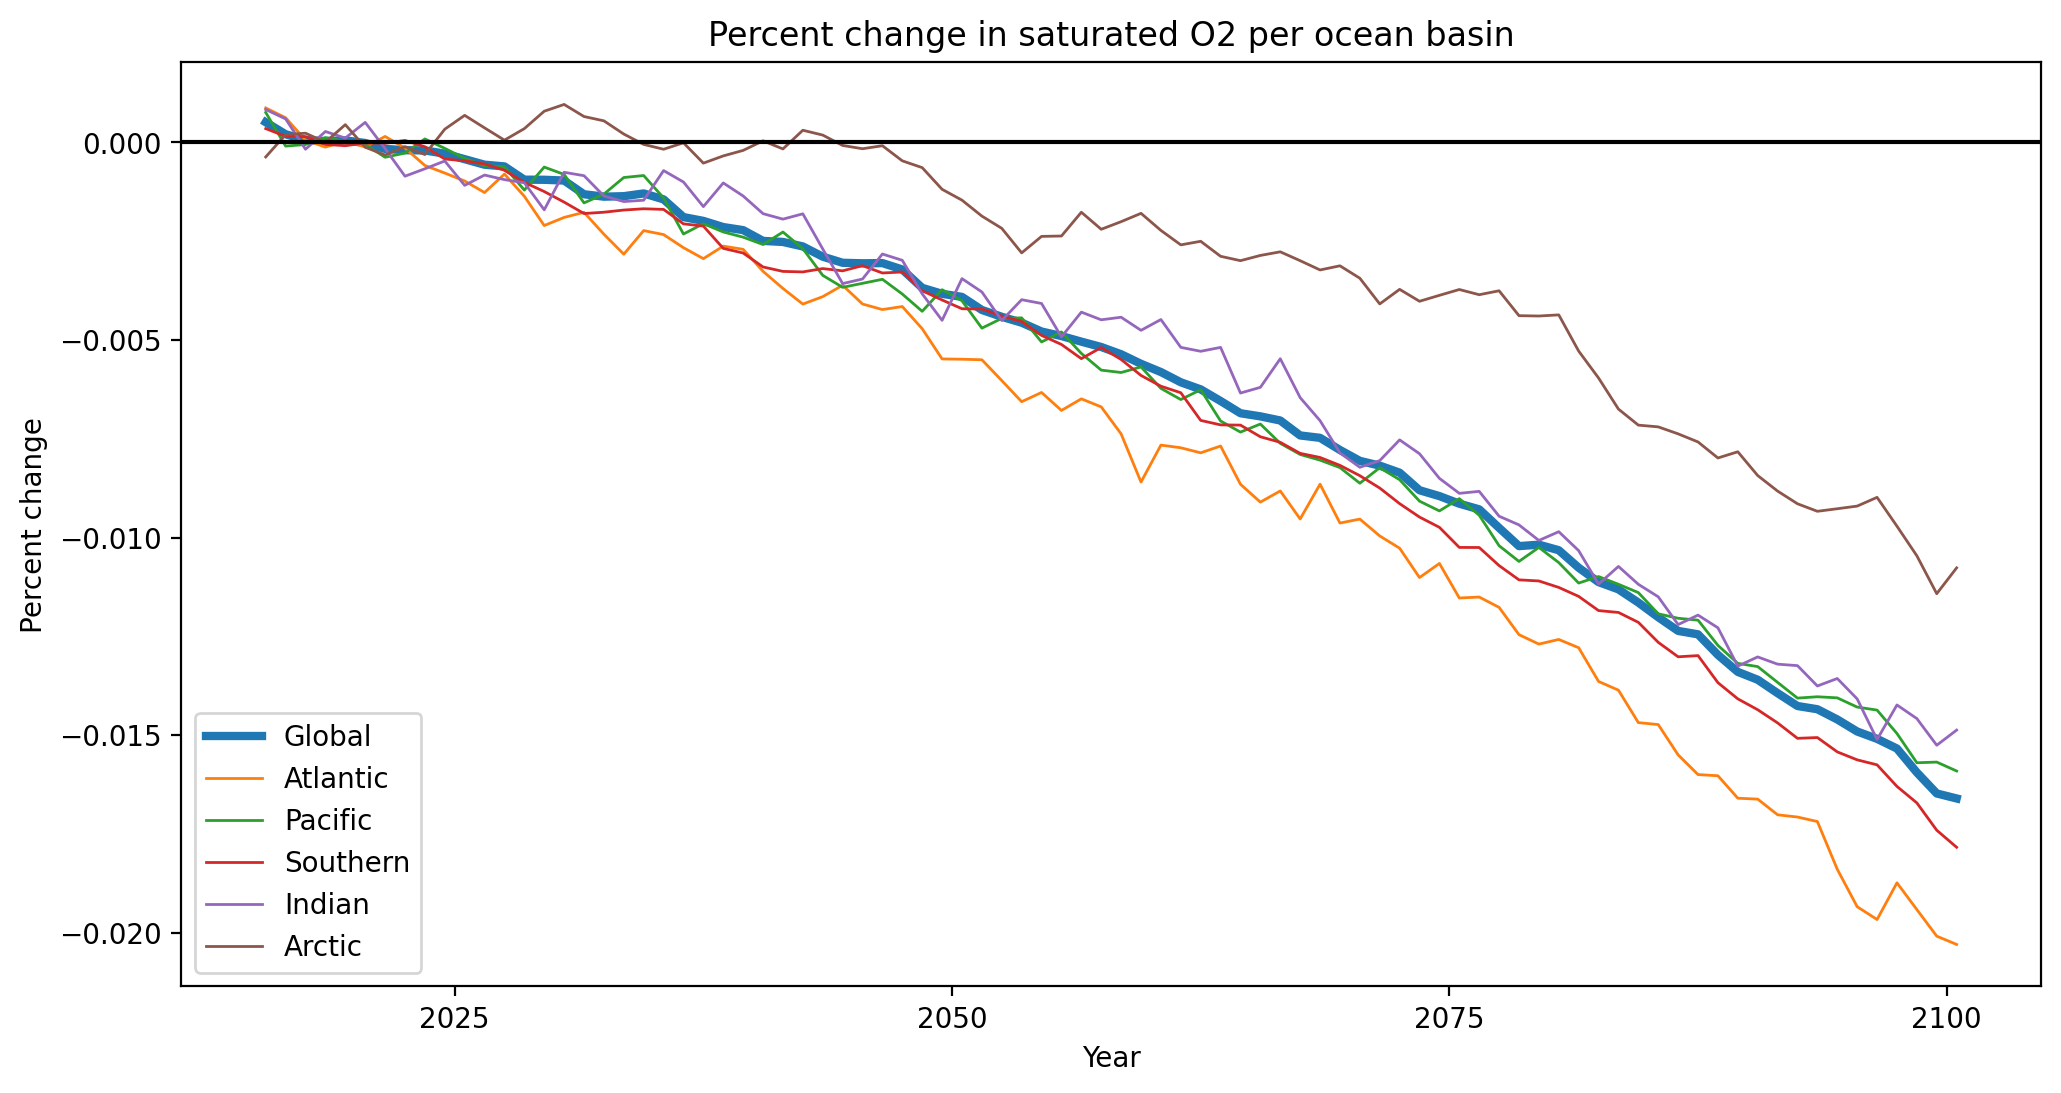

In [38]:
sum_o2sat_global=o2sat_yearly.sum(dim=['latitude','longitude','lev'])  #takes the sum of o2sat throughout the column per year, throughout the entire time
baseline_o2sat_global=o2sat_yearly.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time') #takes sum of o2sat throughout the column per year, for the first 10 years, and takes a mean to be used as a baseline
percentchange_o2sat_global=(sum_o2sat_global-baseline_o2sat_global)/baseline_o2sat_global  #the percent change is (datapoint-baseline)/baseline

sum_o2sat_atlantic=esm4_o2sat_atlantic.sum(dim=['latitude','longitude','lev']) #repeat the process for each basin
baseline_o2sat_atlantic=esm4_o2sat_atlantic.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2sat_atlantic=(sum_o2sat_atlantic-baseline_o2sat_atlantic)/baseline_o2sat_atlantic

sum_o2sat_pacific=esm4_o2sat_pacific.sum(dim=['latitude','longitude','lev'])
baseline_o2sat_pacific=esm4_o2sat_pacific.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2sat_pacific=(sum_o2sat_pacific-baseline_o2sat_pacific)/baseline_o2sat_pacific

sum_o2sat_southern=esm4_o2sat_southern.sum(dim=['latitude','longitude','lev'])
baseline_o2sat_southern=esm4_o2sat_southern.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2sat_southern=(sum_o2sat_southern-baseline_o2sat_southern)/baseline_o2sat_southern

sum_o2sat_indian=esm4_o2sat_indian.sum(dim=['latitude','longitude','lev'])
baseline_o2sat_indian=esm4_o2sat_indian.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2sat_indian=(sum_o2sat_indian-baseline_o2sat_indian)/baseline_o2sat_indian

sum_o2sat_arctic=esm4_o2sat_arctic.sum(dim=['latitude','longitude','lev'])
baseline_o2sat_arctic=esm4_o2sat_arctic.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_o2sat_arctic=(sum_o2sat_arctic-baseline_o2sat_arctic)/baseline_o2sat_arctic
fig,ax=plt.subplots() #repeat the same process that was done for o2 in the cell for the lineplot setup

percentchange_o2sat_global.plot(ax=ax,linewidth=3,label="Global")
percentchange_o2sat_atlantic.plot(ax=ax,linewidth=1,label="Atlantic")
percentchange_o2sat_pacific.plot(ax=ax,linewidth=1,label="Pacific")
percentchange_o2sat_southern.plot(ax=ax,linewidth=1,label="Southern")
percentchange_o2sat_indian.plot(ax=ax,linewidth=1,label="Indian")
percentchange_o2sat_arctic.plot(ax=ax,linewidth=1,label="Arctic")
ax.axhline(0,color="black") #adds a line at 0, for 0% change
ax.legend()

ax.set_title("Percent change in saturated O2 per ocean basin")
ax.set_ylabel("Percent change")
ax.set_xlabel("Year")

**Figure 14.**  Time series plot based on the ESM4 data depicts trends from each basin, showing the percent change in Saturated Oxygen.

### <span style="color:blue">__Apparent Oxygen Utilization (Megan)__

Text(0.3, 0.75, 'Projected change in AOU [μmol/kg] from 2015 to 2100')

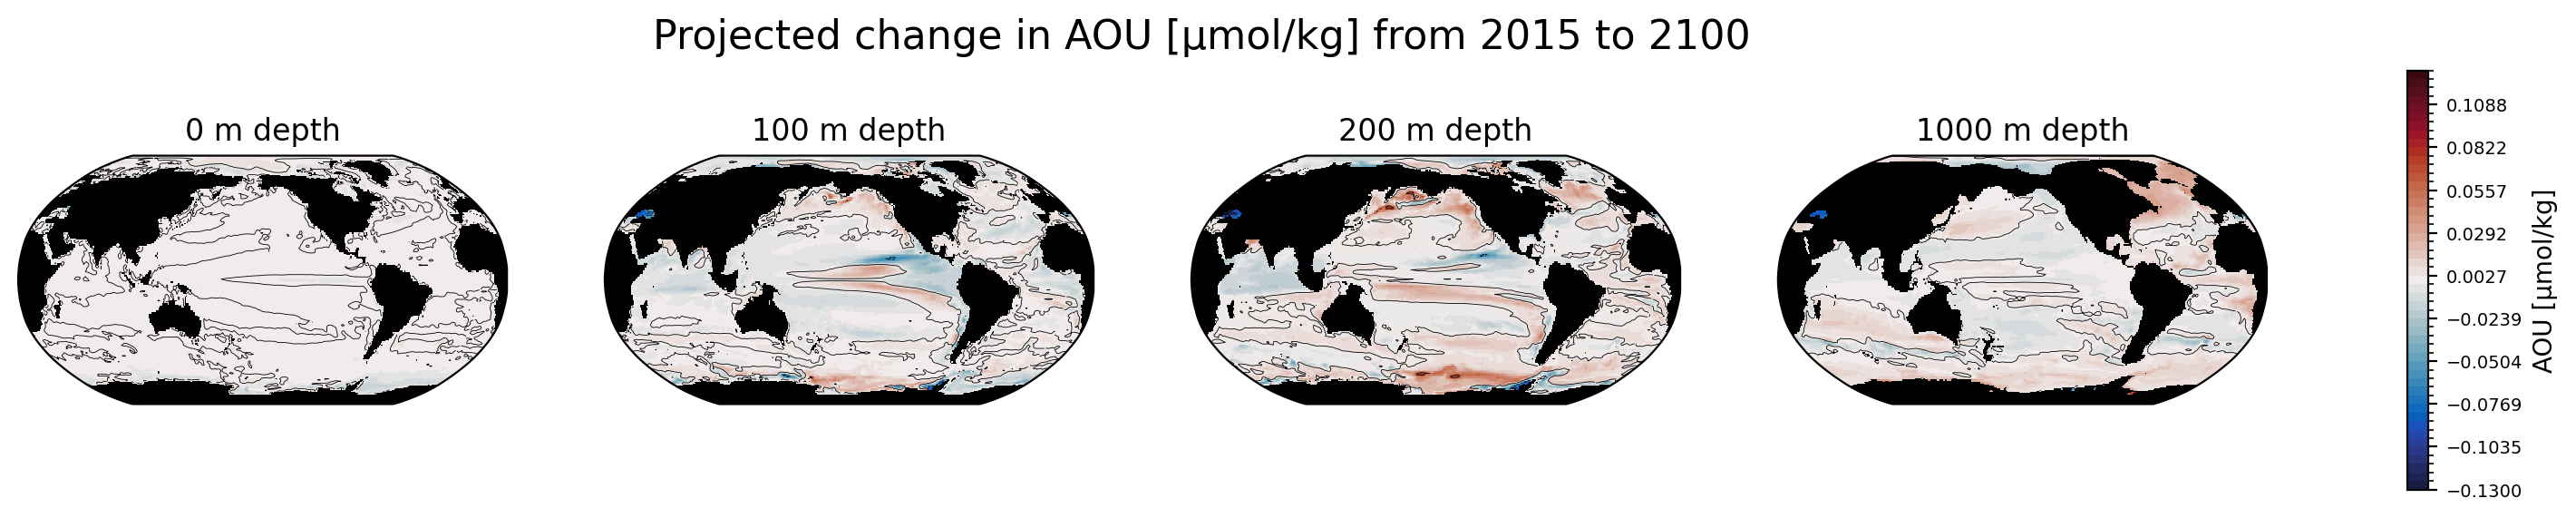

In [39]:
# Define subplot dict
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=200),facecolor='black')
# Create a figure with 1 row and 4 columns
fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(20,5),ncols=4,nrows=1,subplot_kw=subplot_kws)
axlist=[ax1,ax2,ax3,ax4]
#Assign difference dataset to 4 subplots, separated by depths (levels) 0,100,200,1000
p=aou_difference_lastminusfirst.sel(lev=0,method='nearest').plot(ax=ax1,vmin=-0.13,vmax=0.13,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
aou_difference_lastminusfirst.sel(lev=0,method='nearest').plot.contour(ax=ax1,vmin=-0.13,vmax=0.13,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())
aou_difference_lastminusfirst.sel(lev=100,method='nearest').plot(ax=ax2,vmin=-0.13,vmax=0.13,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
aou_difference_lastminusfirst.sel(lev=100,method='nearest').plot.contour(ax=ax2,vmin=-0.13,vmax=0.13,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())
aou_difference_lastminusfirst.sel(lev=200,method='nearest').plot(ax=ax3,vmin=-0.13,vmax=0.13,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
aou_difference_lastminusfirst.sel(lev=200,method='nearest').plot.contour(ax=ax3,vmin=-0.13,vmax=0.13,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())
aou_difference_lastminusfirst.sel(lev=1000,method='nearest').plot(ax=ax4,vmin=-0.13,vmax=0.13,cmap=cmocean.cm.balance,levels=50,transform=ccrs.PlateCarree(),add_colorbar=False)
aou_difference_lastminusfirst.sel(lev=1000,method='nearest').plot.contour(ax=ax4,vmin=-0.13,vmax=0.13,levels=5,colors="black",linewidths=0.3,transform=ccrs.PlateCarree())
#colorbar
cb = plt.colorbar(p,shrink=0.6,ax=axlist)
cb.ax.tick_params(labelsize=7)
cb.set_label(label='AOU [μmol/kg]')
#subplot titles
ax1.set_title("0 m depth")
ax2.set_title("100 m depth")
ax3.set_title("200 m depth")
ax4.set_title("1000 m depth")
#figure title
fig.text(0.3,0.75,"Projected change in AOU [μmol/kg] from 2015 to 2100",size=16)

**Figure 15.** Projected global ocean change in Apparent Oxygen Utilization (AOU) (μmol/kg) at depths 0 m, 100 m, 200 m, 1000 m, years 2015-2100. Maps show all 5 ocean basins. Data is from World Ocean Atlas 2018 (WOA18) dataset.

Text(0.5, 0, 'Year')

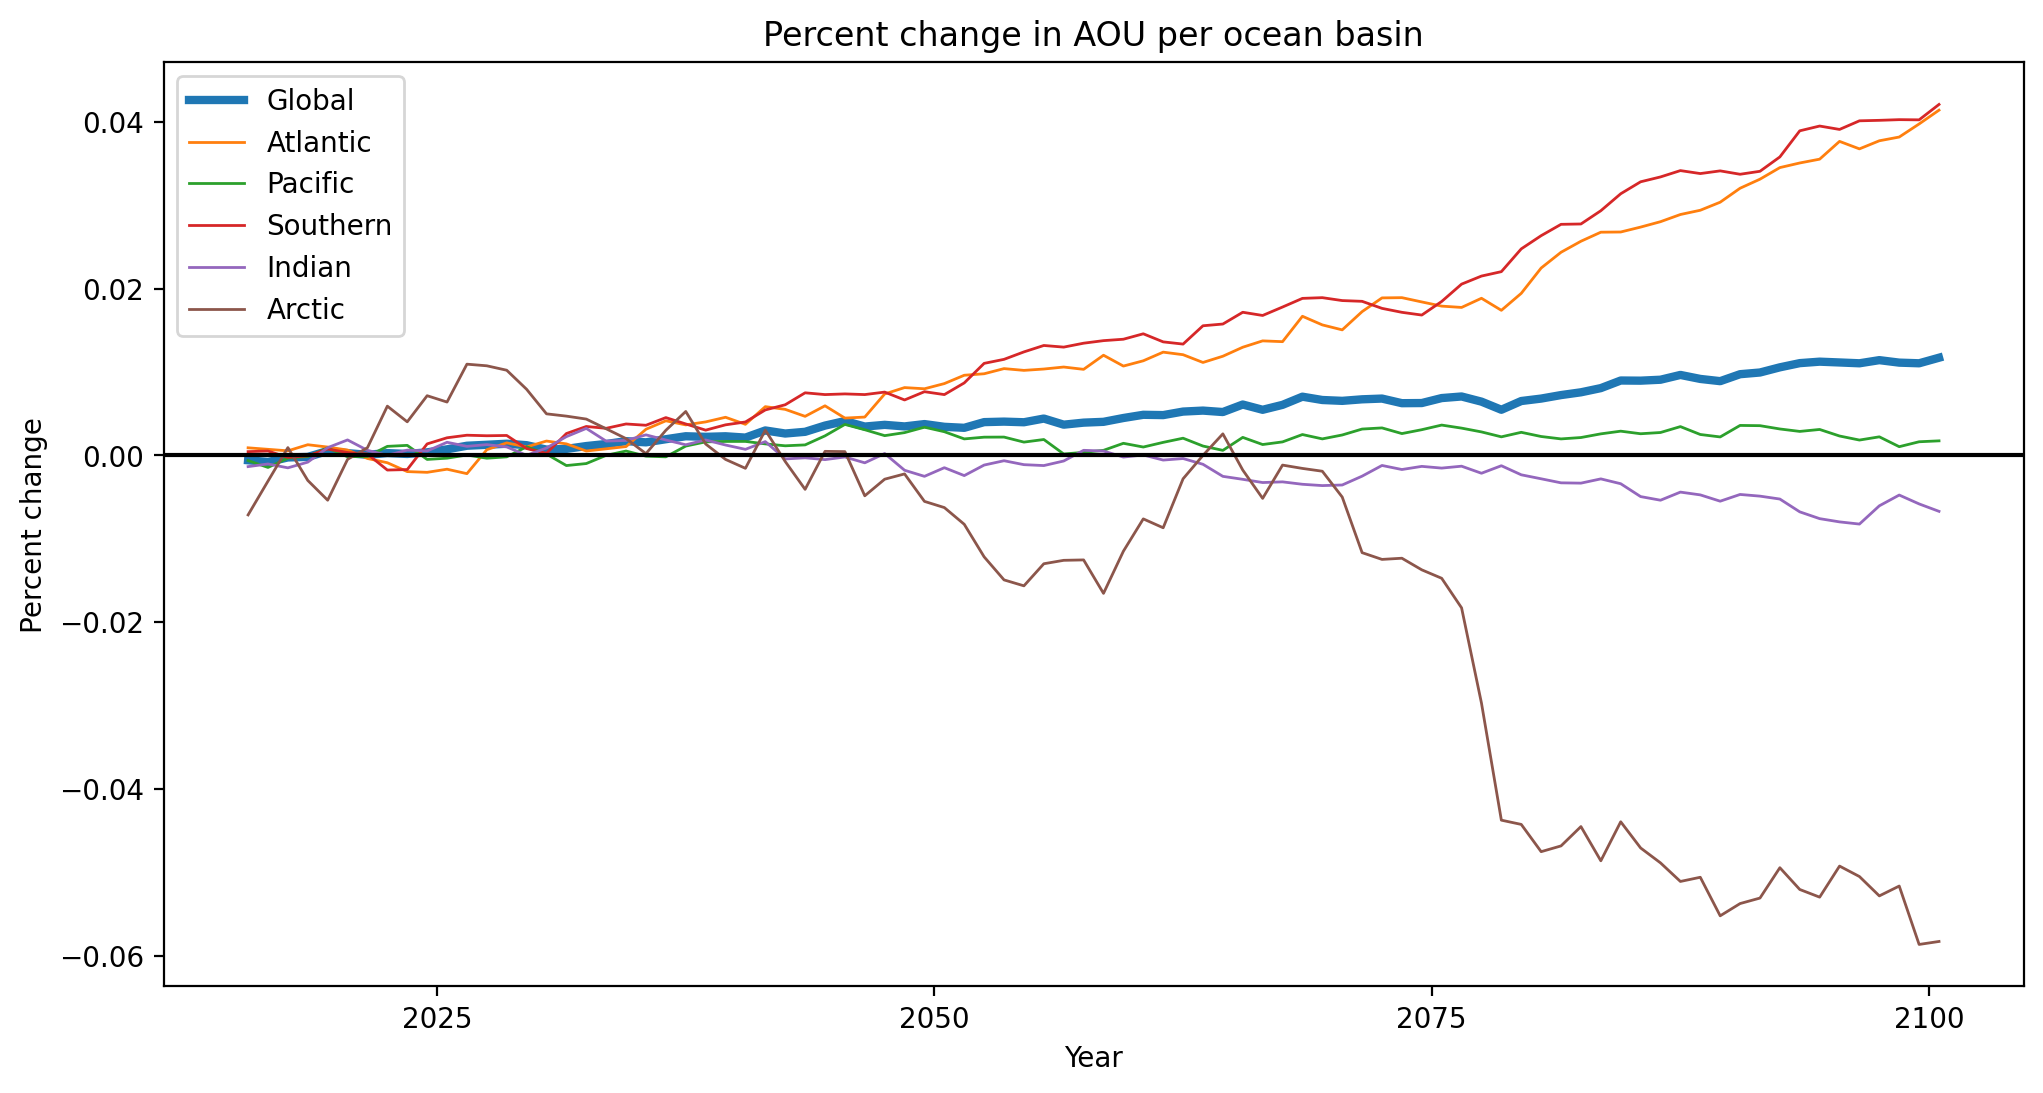

In [40]:
sum_aou_global=aou_yearly.sum(dim=['latitude','longitude','lev']) #takes the sum of aou throughout the column per year, throughout the entire time
baseline_aou_global=aou_yearly.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time') #takes sum of aou throughout the column per year, for the first 10 years, and takes a mean to be used as a baseline
percentchange_aou_global=(sum_aou_global-baseline_aou_global)/baseline_aou_global  #the percent change is (datapoint-baseline)/baseline

sum_aou_atlantic=esm4_aou_atlantic.sum(dim=['latitude','longitude','lev']) #repeat the process for each basin
baseline_aou_atlantic=esm4_aou_atlantic.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_aou_atlantic=(sum_aou_atlantic-baseline_aou_atlantic)/baseline_aou_atlantic

sum_aou_pacific=esm4_aou_pacific.sum(dim=['latitude','longitude','lev'])
baseline_aou_pacific=esm4_aou_pacific.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_aou_pacific=(sum_aou_pacific-baseline_aou_pacific)/baseline_aou_pacific

sum_aou_southern=esm4_aou_southern.sum(dim=['latitude','longitude','lev'])
baseline_aou_southern=esm4_aou_southern.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_aou_southern=(sum_aou_southern-baseline_aou_southern)/baseline_aou_southern

sum_aou_indian=esm4_aou_indian.sum(dim=['latitude','longitude','lev'])
baseline_aou_indian=esm4_aou_indian.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_aou_indian=(sum_aou_indian-baseline_aou_indian)/baseline_aou_indian

sum_aou_arctic=esm4_aou_arctic.sum(dim=['latitude','longitude','lev'])
baseline_aou_arctic=esm4_aou_arctic.isel(time=slice(0,10)).sum(dim=['latitude','longitude','lev']).mean(dim='time')
percentchange_aou_arctic=(sum_aou_arctic-baseline_aou_arctic)/baseline_aou_arctic
fig,ax=plt.subplots() #repeat the same process that was done for o2 in the cell for the lineplot setup

percentchange_aou_global.plot(ax=ax,linewidth=3,label="Global")
percentchange_aou_atlantic.plot(ax=ax,linewidth=1,label="Atlantic")
percentchange_aou_pacific.plot(ax=ax,linewidth=1,label="Pacific")
percentchange_aou_southern.plot(ax=ax,linewidth=1,label="Southern")
percentchange_aou_indian.plot(ax=ax,linewidth=1,label="Indian")
percentchange_aou_arctic.plot(ax=ax,linewidth=1,label="Arctic")
ax.axhline(0,color="black") #adds a line at 0, for 0% change
ax.legend()

ax.set_title("Percent change in AOU per ocean basin")
ax.set_ylabel("Percent change")
ax.set_xlabel("Year")

**Figure 16.** Time series plot based on the ESM4 data depicts trends from each basin, showing the percent change in AOU.

___

## <span style="color:gray">__Projections & Time Series Plots - Why is this important?__

#### The ESM4 data allowed us to obtain predictions for the ocean operation basin under the SSP5-8.5 scenario. This enabled us to make projections based on our observed baseline data.

1. For apparent oxygen utilization (AOU), the Southern and Atlantic Oceans show an increase in oxygen from the baseline levels. In contrast, the Arctic shows the greatest loss in AOU, which is attributed to Arctic amplification. This polar region is experiencing some of the highest losses due to its high albedo. 

2. For oxygen saturation, all basins globally exhibit a decrease in saturated oxygen. Based on the baseline data, this indicates a significant loss in saturated oxygen across all oceans.

3. Regarding dissolved oxygen, there is an overall downward trend in oxygen usage. The Arctic region approaches zero due to its colder temperatures, which allow it to retain gas more effectively than warmer oceans. Overall, this indicates a global decrease in dissolved oxygen levels.

___

___

## <span style="color:Navy"><u> **Is the Ocean Running Out of Oxygen?**

#### With a 10-year (2015-2025) baseline of recorded and yearly averaged dissolved oxygen, oxygen saturation, and apparent oxygen utilization, the projected deviation of these variables from the baseline can be seen. The projected trends in Figures 11 through 16 run the SSP5-8.5 scenario against the 10-year baseline to 2100.

#### The projected dissolved oxygen content globally in the world's oceans show a decline overall (Figure 12).
#### The projected oxygen saturation in the world's oceans show a decline overall (Figure 14).
#### The projected apparent oxygen utilization in the world's ocean will increase (Figure 16).

## In conclusion, the datasets and the SSP scenario utilized to perform this analysis indicate that the global ocean's oxygen content is projected to decline.

---

# <span style="color:skyblue"><u> **Authors Contribution**

Throughout this notebook, the project was divided into three categories.
1. All authors contributed equally in a __Word document outlining__ what we wanted to be represented through calculations, organizations, and plot examples while maintaining consistency with the outline for credit for this final project.
        Nadia Chichester made the initial outline, -Beth continued the outline, -Megan Edited the final product
2. __Data analysis__ All code was produced, edited, and shared equally through Slack and shared documents. Initial figures were made and suggested, and each person edited the figures until we collaboratively found the best way to represent the big question: Is the Ocean Running out of Oxygen?
        All members were assigned to create initial graphs of the WOA data based on  (SAT), Dissolved Oxygen, and Apparent Oxygen Utilization (AOU). Megan brainstormed the calculations needed for the time series plots and the associated math. Beth made critical edits to the initial plots, finalizing them, while Nadia reviewed and combined the necessary code to depict the overall picture of the project.
3. __Blog Post & Final Product__
        We split the post into three sections. The first section explained the importance of oxygen and the WOA data. The second section personified oxygen to enhance the science communication aspect, helping readers understand how oxygen levels are decreasing in the ocean. Lastly, the third section presented the results, displaying our plots and data related to the importance of the ocean. All members were responsible for editing and reviewing each other's work.

---

## <span style="color:steelblue"> __Credit and Citations__

- All sources for articles are cited throughout the notebook
- The utilization of Grammarly helped keep the notebook concise and to decrease spelling errors 

___